In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.rdMolDescriptors import CalcNumHBA
from rdkit.Chem.rdMolDescriptors import CalcNumHBD

import numpy as np
import pandas as pd

import os

생각해보니, filtered 된 DB들을 합칠게 아니라, pirmary processed DB들을 합쳐서 filter 해야됨 (중복데이터에 대해 Rf clustering 통해서 이상치 걸러내는거니까)
추가적으로, 어차피 PE도 hexane 에서 쓸꺼면, 567DB 말고  PE_hex DB 기준으로 filtering 해야 하는 거 아닌가? 싶음

# Data analysis

# Primary processd DB

In [2]:
#hand
hand = pd.read_csv('../collecting/primary_processed_PE_hex/hand_PE_hex.csv')
hand_567 = pd.read_csv('../collecting/primary_processed_PE_567/hand_PE_567.csv')
hand_567

Smiles       elu1  \
0                        CCC(=O)C(Cc1ccc(Br)cc1)C(=O)CC     CCCCCC   
1                          O=C(O)C(Cc1ccc(Br)cc1)C(=O)O     CCCCCC   
2                                  O=C(O)CCc1ccc(Br)cc1     CCCCCC   
3                                   O=C1CCc2ccc(Br)cc21     CCCCCC   
4                                    OC1CCc2ccc(Br)cc21     CCCCCC   
...                                                 ...        ...   
4633  CC[C@H](NC(C)=O)c1ccc(COc2ccc3c(c2)CC[C@@H]2[C...  CCOC(C)=O   
4634                        CCOC(=O)CCC1(NC(C)=O)CCCCC1  CCOC(C)=O   
4635                                 O=C1CCC2(CCCCC2)N1  CCOC(C)=O   
4636          CCC(NC(C)=O)c1ccc(CN2CCN(c3ccccc3)CC2)cc1  CCOC(C)=O   
4637                     CC(=O)NC(C)(C)C1CC=C(CCC#N)CC1  CCOC(C)=O   

                      elu2  ratio1  ratio2    Rf  \
0                CCOC(C)=O     0.9     0.1  0.40   
1                CCOC(C)=O     0.7     0.3  0.05   
2                CCOC(C)=O     0.7     0.3  0.10   
3                CCOC(C)=O     0.7     0.3  0.65   
4                CCOC(C)=O     0.7     0.3  0.55   
...                    ...     ...     ...   ...   
4633  CCCCC.CCCCCC.CCCCCCC     0.5     0.5  0.30   
4634  CCCCC.CCCCCC.CCCCCCC     0.5     0.5  0.40   
4635  CCCCC.CCCCCC.CCCCCCC     0.5     0.5  0.40   
4636  CCCCC.CCCCCC.CCCCCCC     0.7     0.3  0.30   
4637  CCCCC.CCCCCC.CCCCCCC     0.5     0.5  0.40   

                                                  title  \
0     A Site-Specific Synthetic Route to Substituted...   
1     A Site-Specific Synthetic Route to Substituted...   
2     A Site-Specific Synthetic Route to Substituted...   
3     A Site-Specific Synthetic Route to Substituted...   
4     A Site-Specific Synthetic Route to Substituted...   
...                                                 ...   
4633  Photochemical Alkylamination of Olefins throug...   
4634  Photochemical Alkylamination of Olefins throug...   
4635  Photochemical Alkylamination of Olefins throug...   
4636  Photochemical Alkylamination of Olefins throug...   
4637  Photochemical Alkylamination of Olefins throug...   

                                                    doi Rf_type  
0                           10.1021/acs.orglett.3c03369       Q  
1                           10.1021/acs.orglett.3c03369       Q  
2                           10.1021/acs.orglett.3c03369       Q  
3                           10.1021/acs.orglett.3c03369       Q  
4                           10.1021/acs.orglett.3c03369       Q  
...                                                 ...     ...  
4633  https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
4634  https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
4635  https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
4636  https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
4637  https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  

[4638 rows x 9 columns]

In [3]:
# intern_ SY
intern_sy = pd.read_csv('../collecting/primary_processed_PE_hex/intern_sy_PE_hex.csv')
intern_sy_567 = pd.read_csv('../collecting/primary_processed_PE_567/intern_sy_PE_567.csv')
intern_sy

Smiles       elu1  \
0                CP(C)(=O)[C@]12CCC[C@H]1CN(Cc1ccccc1)C2      ClCCl   
1                             C=C(c1cccc(OC)c1)P(C)(C)=O      ClCCl   
2             CP(C)(=O)C1=C[C@H]2CC[C@@H](C1)N2C(=O)[O-]      ClCCl   
3                                      CP(C)(=O)C1=CCOC1      ClCCl   
4                                      CP(C)(=O)C1=CCOC1      ClCCl   
...                                                  ...        ...   
21241  C=CC1COC(c2ccccc2)c2c(-c3cccc4ccccc34)oc(-c3cc...     CCCCCC   
21242  C=CC1COC(c2ccccc2)c2c(-c3cccc4ccccc34)oc(-c3cc...     CCCCCC   
21243  C=C[C@H]1CO[C@@H](c2ccc(C#N)cc2)c2c(-c3ccccc3)...  CCOC(C)=O   
21244  C=C[C@H]1CO[C@@H](c2ccccc2)c2c(-c3ccccc3)oc(-c...     CCCCCC   
21245  C=C[C@H]1CO[C@@H](c2ccccc2)c2c(-c3ccccc3)oc(-c...     CCCCCC   

            elu2    ratio1    ratio2    Rf  \
0             CO  0.950000  0.050000  0.26   
1             CO  0.950000  0.050000  0.21   
2             CO  0.950000  0.050000  0.18   
3             CO  0.950000  0.050000  0.23   
4             CO  0.950000  0.050000  0.26   
...          ...       ...       ...   ...   
21241  CCOC(C)=O  0.975610  0.024390  0.15   
21242  CCOC(C)=O  0.975610  0.024390  0.19   
21243     CCCCCC  0.950000  0.050000  0.30   
21244  CCOC(C)=O  0.952381  0.047619  0.13   
21245  CCOC(C)=O  0.967742  0.032258  0.11   

                                                   title  \
0        P(O)Me2–Alkenes: From Synthesis to Applications   
1        P(O)Me2–Alkenes: From Synthesis to Applications   
2        P(O)Me2–Alkenes: From Synthesis to Applications   
3        P(O)Me2–Alkenes: From Synthesis to Applications   
4        P(O)Me2–Alkenes: From Synthesis to Applications   
...                                                  ...   
21241  Highly Regio- and Diastereoselective Synthesis...   
21242  Highly Regio- and Diastereoselective Synthesis...   
21243  Highly Regio- and Diastereoselective Synthesis...   
21244  Highly Regio- and Diastereoselective Synthesis...   
21245  Highly Regio- and Diastereoselective Synthesis...   

                                                     doi Rf_type  
0      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
1      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
2      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
3      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
4      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
...                                                  ...     ...  
21241  https://pubs.acs.org/doi/10.1021/acs.orglett.4...       C  
21242  https://pubs.acs.org/doi/10.1021/acs.orglett.4...       C  
21243  https://pubs.acs.org/doi/10.1021/acs.orglett.4...       C  
21244  https://pubs.acs.org/doi/10.1021/acs.orglett.4...       C  
21245  https://pubs.acs.org/doi/10.1021/acs.orglett.4...       C  

[21246 rows x 9 columns]

In [4]:
# gpt 
gpt = pd.read_csv('../collecting/primary_processed_PE_hex/gpt_PE_hex.csv')

gpt_567 = pd.read_csv('../collecting/primary_processed_PE_567/gpt_PE_567.csv')

gpt_567

Smiles  \
0           COc1ccc(C#Cc2ccccc2C(=O)/C=C/c2ccc(I)cc2)cc1   
1                   O=C1C(c2ccccc2)=C(c2ccccc2)c2ccccc21   
2             COc1ccc(C2=C(c3ccc(OC)cc3)c3ccccc3C2=O)cc1   
3             O=C1C(c2ccc(F)cc2)=C(c2ccc(F)cc2)c2ccccc21   
4      O=C1C(c2ccc(C(F)(F)F)cc2)=C(c2ccc(C(F)(F)F)cc2...   
...                                                  ...   
23853       CC(C)OC(=O)C1=Cc2cc(Br)ccc2C(=[N+]=[N-])C1=O   
23854  CCCc1c(-c2c(O)c(C(=O)OC)cc3ccccc23)n(C)c2cc(C)...   
23855               COC(=O)c1cccc2c1C=CC(=O)C2=[N+]=[N-]   
23856  CCCc1c(-c2c(O)ccc3c(C(=O)OC)cccc23)n(C)c2cc(C)...   
23857             Cc1cc(C)c2c(CNC(=O)OC(C)(C)C)cn(C)c2c1   

                       elu1       elu2    ratio1    ratio2   Rf  \
0                    CCCCCC  CCOC(C)=O  0.995000  0.005000  0.2   
1                    CCCCCC  CCOC(C)=O  0.950000  0.050000  0.5   
2                    CCCCCC  CCOC(C)=O  0.950000  0.050000  0.4   
3                    CCCCCC  CCOC(C)=O  0.950000  0.050000  0.4   
4                    CCCCCC  CCOC(C)=O  0.950000  0.050000  0.4   
...                     ...        ...       ...       ...  ...   
23853  CCCCC.CCCCCC.CCCCCCC  CCOC(C)=O  0.750000  0.250000  0.2   
23854  CCCCC.CCCCCC.CCCCCCC  CCOC(C)=O  0.952381  0.047619  0.4   
23855  CCCCC.CCCCCC.CCCCCCC  CCOC(C)=O  0.833333  0.166667  0.3   
23856  CCCCC.CCCCCC.CCCCCCC  CCOC(C)=O  0.952381  0.047619  0.2   
23857  CCCCC.CCCCCC.CCCCCCC  CCOC(C)=O  0.909091  0.090909  0.2   

                                                   title  \
0      Phosphine-Based Porous Organic Polymer-Stabili...   
1      Phosphine-Based Porous Organic Polymer-Stabili...   
2      Phosphine-Based Porous Organic Polymer-Stabili...   
3      Phosphine-Based Porous Organic Polymer-Stabili...   
4      Phosphine-Based Porous Organic Polymer-Stabili...   
...                                                  ...   
23853  Atroposelective Synthesis of Axially Chiral C2...   
23854  Atroposelective Synthesis of Axially Chiral C2...   
23855  Atroposelective Synthesis of Axially Chiral C2...   
23856  Atroposelective Synthesis of Axially Chiral C2...   
23857  Atroposelective Synthesis of Axially Chiral C2...   

                                                     doi Rf_type  
0      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
1      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
2      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
3      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
4      https://pubs.acs.org/doi/10.1021/acs.orglett.5...       Q  
...                                                  ...     ...  
23853  https://pubs.acs.org/doi/10.1021/acs.orglett.2...       Q  
23854  https://pubs.acs.org/doi/10.1021/acs.orglett.2...       Q  
23855  https://pubs.acs.org/doi/10.1021/acs.orglett.2...       Q  
23856  https://pubs.acs.org/doi/10.1021/acs.orglett.2...       Q  
23857  https://pubs.acs.org/doi/10.1021/acs.orglett.2...       Q  

[23858 rows x 9 columns]

In [5]:
## d4c 데이터 합
d4c_all  = pd.concat([hand, intern_sy, gpt], axis=0, ignore_index=True)
d4c_all_567 = pd.concat([hand_567, intern_sy_567, gpt_567], axis=0, ignore_index=True)


# d4c_all  = pd.concat([hand, intern_sy], axis=0, ignore_index=True)
# d4c_all_567 = pd.concat([hand_567, intern_sy_567], axis=0, ignore_index=True)


data_source = ['D4C' for i in range(len(d4c_all))]
d4c_all['DataSource'] = data_source
d4c_all_567['DataSource'] = data_source

d4c_all = d4c_all[['Smiles', 'elu1', 'elu2', 'ratio1', 'ratio2', 'Rf', 'Rf_type', 'DataSource', 'doi']]
d4c_all_567 = d4c_all_567[['Smiles', 'elu1', 'elu2', 'ratio1', 'ratio2', 'Rf', 'Rf_type', 'DataSource', 'doi']]

d4c_all.columns = ['Smiles', 'elu1_smiles', 'elu2_smiles', 'ratio1', 'ratio2', 'Rf', 'Rf_type', 'DataSource', 'doi']
d4c_all_567.columns = ['Smiles', 'elu1_smiles', 'elu2_smiles', 'ratio1', 'ratio2', 'Rf', 'Rf_type', 'DataSource', 'doi']
d4c_all

Smiles elu1_smiles  \
0                         CCC(=O)C(Cc1ccc(Br)cc1)C(=O)CC      CCCCCC   
1                           O=C(O)C(Cc1ccc(Br)cc1)C(=O)O      CCCCCC   
2                                   O=C(O)CCc1ccc(Br)cc1      CCCCCC   
3                                    O=C1CCc2ccc(Br)cc21      CCCCCC   
4                                     OC1CCc2ccc(Br)cc21      CCCCCC   
...                                                  ...         ...   
49737       CC(C)OC(=O)C1=Cc2cc(Br)ccc2C(=[N+]=[N-])C1=O      CCCCCC   
49738  CCCc1c(-c2c(O)c(C(=O)OC)cc3ccccc23)n(C)c2cc(C)...      CCCCCC   
49739               COC(=O)c1cccc2c1C=CC(=O)C2=[N+]=[N-]      CCCCCC   
49740  CCCc1c(-c2c(O)ccc3c(C(=O)OC)cccc23)n(C)c2cc(C)...      CCCCCC   
49741             Cc1cc(C)c2c(CNC(=O)OC(C)(C)C)cn(C)c2c1      CCCCCC   

      elu2_smiles    ratio1    ratio2    Rf Rf_type DataSource  \
0       CCOC(C)=O  0.900000  0.100000  0.40       Q        D4C   
1       CCOC(C)=O  0.700000  0.300000  0.05       Q        D4C   
2       CCOC(C)=O  0.700000  0.300000  0.10       Q        D4C   
3       CCOC(C)=O  0.700000  0.300000  0.65       Q        D4C   
4       CCOC(C)=O  0.700000  0.300000  0.55       Q        D4C   
...           ...       ...       ...   ...     ...        ...   
49737   CCOC(C)=O  0.750000  0.250000  0.20       Q        D4C   
49738   CCOC(C)=O  0.952381  0.047619  0.40       Q        D4C   
49739   CCOC(C)=O  0.833333  0.166667  0.30       Q        D4C   
49740   CCOC(C)=O  0.952381  0.047619  0.20       Q        D4C   
49741   CCOC(C)=O  0.909091  0.090909  0.20       Q        D4C   

                                                     doi  
0                            10.1021/acs.orglett.3c03369  
1                            10.1021/acs.orglett.3c03369  
2                            10.1021/acs.orglett.3c03369  
3                            10.1021/acs.orglett.3c03369  
4                            10.1021/acs.orglett.3c03369  
...                                                  ...  
49737  https://pubs.acs.org/doi/10.1021/acs.orglett.2...  
49738  https://pubs.acs.org/doi/10.1021/acs.orglett.2...  
49739  https://pubs.acs.org/doi/10.1021/acs.orglett.2...  
49740  https://pubs.acs.org/doi/10.1021/acs.orglett.2...  
49741  https://pubs.acs.org/doi/10.1021/acs.orglett.2...  

[49742 rows x 9 columns]

In [6]:
# nat.comm
nat = pd.read_csv('../collecting/primary_processed_PE_hex/nat_commun_raw_PE_hex.csv')
nat_567 = pd.read_csv('../collecting/primary_processed_PE_567/nat_commun_raw_PE_567.csv')

data_source = ['benchmark' for i in range(len(nat))]
nat['DataSource']=data_source
nat_567['DataSource']=data_source
doi_column = ['exp (benchmark' for i in range(len(nat))]
nat['doi']=doi_column
nat_567['doi']=doi_column
nat



Smiles elu1_smiles elu2_smiles    ratio1    ratio2  \
0       O=C(CCCl)c1ccccc1      CCCCCC         NaN  1.000000  0.000000   
1       O=C(CCCl)c1ccccc1      CCCCCC   CCOC(C)=O  0.980392  0.019608   
2       O=C(CCCl)c1ccccc1      CCCCCC   CCOC(C)=O  0.952381  0.047619   
3       O=C(CCCl)c1ccccc1      CCCCCC   CCOC(C)=O  0.833333  0.166667   
4       O=C(CCCl)c1ccccc1      CCCCCC   CCOC(C)=O  0.750000  0.250000   
...                   ...         ...         ...       ...       ...   
4854  CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.666667  0.333333   
4855  CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.500000  0.500000   
4856  CC1CCC(=O)c2ccccc21       CCOCC         NaN  1.000000  0.000000   
4857     O=C1CCCc2cccnc21      CCCCCC       CCOCC  0.500000  0.500000   
4858     O=C1CCCc2cccnc21       CCOCC         NaN  1.000000  0.000000   

            Rf Rf_type DataSource             doi  
0     0.049175       C  benchmark  exp (benchmark  
1     0.262708       C  benchmark  exp (benchmark  
2     0.410200       C  benchmark  exp (benchmark  
3     0.719773       C  benchmark  exp (benchmark  
4     0.794856       C  benchmark  exp (benchmark  
...        ...     ...        ...             ...  
4854  0.498683       C  benchmark  exp (benchmark  
4855  0.662423       C  benchmark  exp (benchmark  
4856  0.988897       C  benchmark  exp (benchmark  
4857  0.010664       C  benchmark  exp (benchmark  
4858  0.067325       C  benchmark  exp (benchmark  

[4859 rows x 9 columns]

In [7]:
## 전체 데이터 합
united  = pd.concat([d4c_all, nat], axis=0, ignore_index=True)
united_567 = pd.concat([d4c_all_567, nat_567], axis=0, ignore_index=True)
united

Smiles elu1_smiles elu2_smiles    ratio1  \
0      CCC(=O)C(Cc1ccc(Br)cc1)C(=O)CC      CCCCCC   CCOC(C)=O  0.900000   
1        O=C(O)C(Cc1ccc(Br)cc1)C(=O)O      CCCCCC   CCOC(C)=O  0.700000   
2                O=C(O)CCc1ccc(Br)cc1      CCCCCC   CCOC(C)=O  0.700000   
3                 O=C1CCc2ccc(Br)cc21      CCCCCC   CCOC(C)=O  0.700000   
4                  OC1CCc2ccc(Br)cc21      CCCCCC   CCOC(C)=O  0.700000   
...                               ...         ...         ...       ...   
54596             CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.666667   
54597             CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.500000   
54598             CC1CCC(=O)c2ccccc21       CCOCC         NaN  1.000000   
54599                O=C1CCCc2cccnc21      CCCCCC       CCOCC  0.500000   
54600                O=C1CCCc2cccnc21       CCOCC         NaN  1.000000   

         ratio2        Rf Rf_type DataSource                          doi  
0      0.100000  0.400000       Q        D4C  10.1021/acs.orglett.3c03369  
1      0.300000  0.050000       Q        D4C  10.1021/acs.orglett.3c03369  
2      0.300000  0.100000       Q        D4C  10.1021/acs.orglett.3c03369  
3      0.300000  0.650000       Q        D4C  10.1021/acs.orglett.3c03369  
4      0.300000  0.550000       Q        D4C  10.1021/acs.orglett.3c03369  
...         ...       ...     ...        ...                          ...  
54596  0.333333  0.498683       C  benchmark               exp (benchmark  
54597  0.500000  0.662423       C  benchmark               exp (benchmark  
54598  0.000000  0.988897       C  benchmark               exp (benchmark  
54599  0.500000  0.010664       C  benchmark               exp (benchmark  
54600  0.000000  0.067325       C  benchmark               exp (benchmark  

[54601 rows x 9 columns]

In [ ]:
# ratio 부피비 --> 몰로 단위로 변경 및 정규화 

from rdkit.Chem import Descriptors as D
from tqdm.auto import tqdm

def vol_2_mol_ratio(df, ver):
    # ver : 'hex' or '567'
    elu_inform = pd.read_csv('/home/ufslab223/Shared/KSW/torch_geometric/TLC_RF/DB/data_process/eluent_standard.csv')
    d_converter = dict(zip(elu_inform['hex_Smiles'], elu_inform['density']))
    d_converter_567 = dict(zip(elu_inform['567_Smiles'], elu_inform['density']))

    for i in tqdm(range(len(df))):
        smiles1 = df.loc[i, 'elu1_smiles']
        ratio1 = df.loc[i, 'ratio1']
        smiles2 = df.loc[i, 'elu2_smiles']
        ratio2 = df.loc[i, 'ratio2']

        if ver == 'hex':
            converter = d_converter
        elif ver == '567':
            converter = d_converter_567

        if pd.notna(smiles1):
            df.at[i, 'ratio1'] = ratio1 * converter[smiles1] / D.MolWt(Chem.MolFromSmiles(smiles1))
        if pd.notna(smiles2):
            df.at[i, 'ratio2'] = ratio2 * converter[smiles2] / D.MolWt(Chem.MolFromSmiles(smiles2))

    # 몰 비 정규화
    ratio_total = df[['ratio1', 'ratio2']].sum(axis=1)
    df['ratio1'] = round((df['ratio1'] / ratio_total),6)
    df['ratio2'] = round((df['ratio2'] / ratio_total),6)
    # df['ratio1'] = (df['ratio1'] / ratio_total)
    # df['ratio2'] = (df['ratio2'] / ratio_total)

    return df


#---------PE hex 버전------------

united = vol_2_mol_ratio(united, ver = 'hex')

#---------PE 567 버전------------

united_567 = vol_2_mol_ratio(united_567, ver = '567')




  0%|          | 0/54601 [00:00<?, ?it/s]

  0%|          | 0/54601 [00:00<?, ?it/s]

In [9]:
united

Smiles elu1_smiles elu2_smiles    ratio1  \
0      CCC(=O)C(Cc1ccc(Br)cc1)C(=O)CC      CCCCCC   CCOC(C)=O  0.870849   
1        O=C(O)C(Cc1ccc(Br)cc1)C(=O)O      CCCCCC   CCOC(C)=O  0.636120   
2                O=C(O)CCc1ccc(Br)cc1      CCCCCC   CCOC(C)=O  0.636120   
3                 O=C1CCc2ccc(Br)cc21      CCCCCC   CCOC(C)=O  0.636120   
4                  OC1CCc2ccc(Br)cc21      CCCCCC   CCOC(C)=O  0.636120   
...                               ...         ...         ...       ...   
54596             CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.614610   
54597             CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.443636   
54598             CC1CCC(=O)c2ccccc21       CCOCC         NaN  1.000000   
54599                O=C1CCCc2cccnc21      CCCCCC       CCOCC  0.443636   
54600                O=C1CCCc2cccnc21       CCOCC         NaN  1.000000   

         ratio2        Rf Rf_type DataSource                          doi  
0      0.129151  0.400000       Q        D4C  10.1021/acs.orglett.3c03369  
1      0.363880  0.050000       Q        D4C  10.1021/acs.orglett.3c03369  
2      0.363880  0.100000       Q        D4C  10.1021/acs.orglett.3c03369  
3      0.363880  0.650000       Q        D4C  10.1021/acs.orglett.3c03369  
4      0.363880  0.550000       Q        D4C  10.1021/acs.orglett.3c03369  
...         ...       ...     ...        ...                          ...  
54596  0.385390  0.498683       C  benchmark               exp (benchmark  
54597  0.556364  0.662423       C  benchmark               exp (benchmark  
54598  0.000000  0.988897       C  benchmark               exp (benchmark  
54599  0.556364  0.010664       C  benchmark               exp (benchmark  
54600  0.000000  0.067325       C  benchmark               exp (benchmark  

[54601 rows x 9 columns]

## Filtering & 중복제거

In [10]:
# 일단 PE_567 데이터 셋에서 중복 데이터 중 Rf 이상치 골라내고 (2개 중복인데 그 차이가 큰거는 삭제)
# 골라낸 인덱스 가지고 PE_hex 데이터 셋에서도 삭제하기

In [11]:
'''
## 데이터 쌍 간 거리 기준으로 이상치 하나만 찾기

# 거리 정방행렬 만들기 (절대값 차이) 
dist_matrix = squareform(pdist(rf_values.reshape(-1, 1), metric='euclidean'))

# 각 샘플의 평균 거리 계산
avg_dist = dist_matrix.mean(axis=1)

# 평균 거리 기준 이상치 찾기
outlier_idx = np.argmax(avg_dist)
no_outlier = np.delete(avg_dist, outlier_idx)
if np.std(rf_values) > 0.01 and avg_dist[outlier_idx] > np.mean(no_outlier) * 1.2:
    # 하나만 이상하게 멀리 떨어져 있으면 삭제
    delete_indices.append(indices[outlier_idx])
    delete_data_id.append(data_id)
'''

# update

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
from rich import print as richprint

def filtering_garbage(dataframe, clustering_n):

    delete_indices = []
    delete_data_id = []
    ambiguous_indices = []
    ambiguous_data_id = []
    
    for data_id, group in dataframe.groupby(['Smiles','elu1_smiles','elu2_smiles','ratio1','ratio2'], as_index=True):
        if len(group) == 1:
            continue
    
        rf_values = group['Rf'].values
        indices = group.index.tolist()
            
        if len(group) == 2:
            if np.abs(rf_values[0]-rf_values[1]) >= 0.1:
                delete_indices.extend(indices)
                delete_data_id.append(data_id)
            else:
                continue
    
        else:
            hierarchical_cluster = linkage(rf_values.reshape(-1,1), method = 'complete')
            # method = complete : 계층적cluster내 클러스터간 거리 구할때 데이터 중 최장거리 기준으로 거리를 구함
            cluster_label = fcluster(hierarchical_cluster, t=clustering_n, criterion='distance')
            # cluster간 거리 0.1 이상이면(최장거리 기준) 다른 클러스터로 취급 --> 0.05 기준으로 재필터링
            clusters, cluster_size = np.unique(cluster_label, return_counts = True)
        
            if len(clusters) >= 2 and (np.max(cluster_size) < np.sum(cluster_size)*0.7):
                ambiguous_data_id.append(data_id)
                ambiguous_indices.extend(indices)
                
            else:
                if len(clusters) == 1:
                    continue
                else:
                    # len(clusters) >= 2 and (np.max(cluster_size) > np.sum(cluster_size)*0.7) 인 케이스
                    # 젤 큰 사이즈의 클러스터가 전체의 70% 이상이면 나머지는 버리도록
                    major_cluster_label = clusters[np.argmax(cluster_size)]
                    minor_mask = (cluster_label != major_cluster_label)

                    for idx in np.array(indices)[minor_mask]:
                        delete_indices.append(idx)
                        delete_data_id.append(data_id)

    
    # 결과 표시
    richprint(f"[bold bright_red]삭제할 이상치 인덱스 {len(delete_indices)}개[/bold bright_red]: {delete_indices}")
    richprint("[bold orange1]삭제할 이상치 data_id:[/bold orange1]")
    for d in delete_data_id:
        print(d)
    richprint(f"[bold green1]애매한 data_id {len(ambiguous_indices)}개 (수동 확인 필요):[/bold green1]")
    for d in ambiguous_data_id:
        print(d)
    richprint('[bold bright_red]!!아직 삭제하지 않았고, 삭제 후 인덱스 정렬 필요!![/bold bright_red]')

    return delete_indices, delete_data_id, ambiguous_indices, ambiguous_data_id

In [12]:
delete_indices, delete_data_id, ambiguous_indices, ambiguous_data_id = filtering_garbage(united_567, clustering_n=0.05)

삭제할 이상치 인덱스 342개: [45759, 45760, 49402, 49403, 49442, 49443, 17436, 17437, 40390, 40391, 48531, 48532, 
49027, 49028, 13546, 50574, 52402, 53862, 52401, 53861, 53150, 53516, 53149, 53515, 53148, 53514, 52217, 53300, 
52216, 53299, 52043, 52588, 52042, 52587, 52041, 52586, 27681, 27682, 18667, 18668, 23111, 23112, 19312, 19313, 
39248, 39249, 9531, 9532, 3088, 3089, 18341, 18342, 13045, 13046, 13048, 13049, 7676, 7677, 4756, 4757, 12087, 
12088, 33838, 33839, 3867, 39276, 21641, 21642, 13297, 13301, 39571, 39572, 12893, 12894, 1216, 1217, 46498, 46499,
41281, 51394, 19316, 19317, 9140, 9141, 2517, 2534, 1955, 8495, 12340, 12341, 12084, 12085, 36116, 36117, 40485, 
40486, 52414, 53880, 52413, 53879, 42746, 42747, 23622, 23623, 5828, 5854, 17585, 17586, 13593, 13594, 13595, 
13596, 13574, 13575, 41370, 41371, 21872, 36307, 13798, 13799, 810, 815, 34301, 34302, 35241, 35242, 45793, 45794, 
29433, 29434, 5521, 5522, 52407, 53885, 52397, 53839, 52396, 53838, 52395, 53837, 23069, 40732, 19434, 19435, 
18351, 18352, 492, 493, 40547, 40548, 21311, 21312, 14106, 18005, 23733, 24077, 17423, 17424, 29411, 29412, 29413, 
29414, 23027, 23028, 42323, 51702, 38644, 38645, 2484, 9072, 46259, 46260, 40031, 40032, 52792, 52840, 5539, 5540, 
36975, 36976, 43321, 43322, 28051, 28052, 11972, 11973, 14108, 42214, 42215, 53307, 53427, 53304, 53424, 22418, 
22419, 40848, 40849, 40842, 40843, 11676, 11677, 11652, 11653, 45765, 45766, 14899, 14900, 32896, 32897, 42042, 
42043, 2489, 9084, 32812, 41021, 22415, 22416, 46311, 46337, 24246, 24247, 22412, 22413, 13629, 13630, 1862, 1863, 
18510, 18511, 12076, 12077, 52608, 53170, 14111, 51907, 51930, 51906, 51929, 51905, 51928, 51904, 51927, 51903, 
51926, 51908, 51931, 53967, 54003, 53966, 54002, 53965, 54001, 53964, 54000, 53963, 53999, 42771, 50733, 54029, 
54570, 54030, 54569, 46293, 46322, 36817, 36818, 17882, 50380, 52531, 53756, 52530, 53755, 52529, 53754, 52528, 
53753, 52527, 53752, 12070, 12071, 42470, 42471, 54035, 54361, 54036, 54360, 51994, 52581, 31230, 31231, 31232, 
31233, 1225, 1226, 37073, 37074, 23037, 23038, 38811, 38812, 52788, 52854, 33728, 33729, 52230, 53547, 52229, 
53546, 52228, 53545, 52227, 53544, 12168, 12169, 18630, 18631, 52051, 53818, 52050, 53817, 52049, 53816, 52048, 
53815, 52047, 53814, 53799, 53834, 53717, 53969, 52487, 53624, 23301, 23302, 43345, 43346, 43343, 43344, 18515, 
18516, 1330, 26383]

삭제할 이상치 data_id:

('C#CC/C(=C/[C@H](C)[C@H](O[Si](CC)(CC)CC)c1ccccc1)[Si](C)(C)c1ccccc1', 'CCCCC.CCCCCC.CCCCCCC', 'CCOC(C)=O', 0.882244, 0.117756)
('C=C(Br)C[C@@]1(c2ccccc2)CCC[C@](C)(c2c[nH]c3ccccc23)C1=O', 'CCCCCC', 'ClCCl', 0.328775, 0.671225)
('C=C(CCCCCC)COC1=C(C)CCCC1(O)c1ccccc1', 'CCCCCC', 'CCOC(C)=O', 0.749803, 0.250197)
('C=C1[C@H](O[Si](C)(C)C(C)(C)C)CC[C@]2(C)[C@H]3CCC4=C(CCO)CC[C@H]4[C@]3(C)[C@@H](OC(C)=O)C[C@@H]12', 'CCCCCC', 'CCOC(C)=O', 0.749803, 0.250197)
('C=CCOC(=O)C(=C)CC(I)C(F)(F)F', 'CCCCC.CCCCCC.CCCCCCC', 'CCOC(C)=O', 0.882244, 0.117756)
('C=CCOc1c(C)cccc1C(=C)c1ccccc1', 'CCCCC.CCCCCC.CCCCCCC', 'CCOC(C)=O', 0.833187, 0.166813)
('CC(=O)OC(c1ccccc1)C1COC(C(F)(F)F)N1C(=O)OCc1ccccc1', 'CCCCC', 'CCOC(C)=O', 0.884089, 0.115911)
('CC(=O)Oc1ccc(C=O)cc1', 'CCCCC.CCCCCC.CCCCCCC', 'CCOC(C)=O', 0.833187, 0.166813)
('CC(=O)Oc1ccccc1', 'ClCCl', 'CO', 0.969397, 0.030603)
('CC(=O)Oc1ccccc1', 'ClCCl', 'CO', 0.984461, 0.015539)
('CC(=O)c1ccc(I)cc1', 'ClCCl', 'CO', 0.950015, 0.049985)
('CC(=O)c1ccc(I

애매한 data_id 198개 (수동 확인 필요):

('Brc1ccc2ccccc2c1', 'CCCCC.CCCCCC.CCCCCCC', 'CCOC(C)=O', 0.9615, 0.0385)
('C/C(=C\\C(=O)c1cccc(Br)c1)N(C)C', 'CCCCCC', 'CCOC(C)=O', 0.428314, 0.571686)
('C=CC#CCSc1ccc(C)cc1', 'CCCCC.CCCCCC.CCCCCCC', 'CCOC(C)=O', 0.714071, 0.285929)
('C=C[C@@]1(C)CC[C@@H](C(=C)CO[Si](C)(C)C(C)(C)C)C[C@@]1(O)C(=C)C', 'CCCCC.CCCCCC.CCCCCCC', 'CCOCC', 0.726623, 0.273377)
('CC(=O)NC(C)COc1c(C)cc(-[s+]2c3ccccc3c3ccccc32)cc1C.F[B-](F)(F)F', 'ClCCl', 'CO', 0.926851, 0.073149)
('CC(=O)OC1=C2CC(C#N)C2CCC1', 'CCCCCC', 'CCOC(C)=O', 0.749803, 0.250197)
('CC(=O)OC1=C2CC(C(C)=O)C2CCC1', 'CCCCCC', 'CCOC(C)=O', 0.692083, 0.307917)
('CC(=O)OC[C@H]1O[C@@H](C2=CCCc3ccccc32)[C@H](OC(C)=O)[C@@H]1OC(C)=O', 'CCCCC.CCCCCC.CCCCCCC', 'CCOC(C)=O', 0.428314, 0.571686)
('CC(C)(C)C(=O)OC1=C2CC(c3ccccc3C(F)(F)F)C2CCC1', 'CCCCCC', 'CCOC(C)=O', 0.937438, 0.062562)
('CC(C)(C)OC(=O)N1CCCC1C(C#N)=NOCc1ccccc1', 'CCCCC.CCCCCC.CCCCCCC', 'CC(C)=O', 0.630267, 0.369733)
('CC(C)(C)c1ccc(C#N)cc1', 'CCCCC.CCCCCC.CCCCCCC', 'CCOC(C)=O', 0.925854, 

!!아직 삭제하지 않았고, 삭제 후 인덱스 정렬 필요!!

In [21]:
# 삭제할 애들 확인해보기
index = 50
mask = (united_567.iloc[:, 0:5].fillna('nan') == united_567.iloc[delete_indices[index], 0:5].fillna('nan')).all(axis=1)
united_567[mask]


Smiles elu1_smiles elu2_smiles  \
18341  CC(C)=CCCC1(C)CCC=CCC(=O)C1C(=O)OCC[Si](C)(C)C       CCCCC       ClCCl   
18342  CC(C)=CCCC1(C)CCC=CCC(=O)C1C(=O)OCC[Si](C)(C)C       CCCCC       ClCCl   

         ratio1    ratio2    Rf Rf_type DataSource  \
18341  0.356524  0.643476  0.30       C        D4C   
18342  0.356524  0.643476  0.43       C        D4C   

                                                     doi  
18341  https://pubs.acs.org/doi/10.1021/acs.orglett.4...  
18342  https://pubs.acs.org/doi/10.1021/acs.orglett.4...

In [22]:
# 애매한 애들 확인해보기
index = 10
mask = (united_567.iloc[:, 0:5].fillna('nan') == united_567.iloc[ambiguous_indices[index], 0:5].fillna('nan')).all(axis=1)
united_567[mask]

Smiles  \
28976  C=C[C@@]1(C)CC[C@@H](C(=C)CO[Si](C)(C)C(C)(C)C...   
28977  C=C[C@@]1(C)CC[C@@H](C(=C)CO[Si](C)(C)C(C)(C)C...   
44208  C=C[C@@]1(C)CC[C@@H](C(=C)CO[Si](C)(C)C(C)(C)C...   
44209  C=C[C@@]1(C)CC[C@@H](C(=C)CO[Si](C)(C)C(C)(C)C...   

                elu1_smiles elu2_smiles    ratio1    ratio2    Rf Rf_type  \
28976  CCCCC.CCCCCC.CCCCCCC       CCOCC  0.726623  0.273377  0.55       Q   
28977  CCCCC.CCCCCC.CCCCCCC       CCOCC  0.726623  0.273377  0.61       Q   
44208  CCCCC.CCCCCC.CCCCCCC       CCOCC  0.726623  0.273377  0.55       Q   
44209  CCCCC.CCCCCC.CCCCCCC       CCOCC  0.726623  0.273377  0.61       Q   

      DataSource                                                doi  
28976        D4C  https://pubs.acs.org/doi/10.1021/acs.orglett.2...  
28977        D4C  https://pubs.acs.org/doi/10.1021/acs.orglett.2...  
44208        D4C  https://pubs.acs.org/doi/10.1021/acs.orglett.2...  
44209        D4C  https://pubs.acs.org/doi/10.1021/acs.orglett.2...

In [23]:
# 중복 제거 (평균)하기 전에 이상치 제거!

delete_list = list(set(delete_indices)|set(ambiguous_indices))

united_f = united.drop(delete_list, axis=0)
united_f = united_f.reset_index(drop=True)

united_567_f = united_567.drop(delete_list, axis=0)
united_567_f = united_567_f.reset_index(drop=True)

In [24]:
united_f

Smiles elu1_smiles elu2_smiles    ratio1  \
0      CCC(=O)C(Cc1ccc(Br)cc1)C(=O)CC      CCCCCC   CCOC(C)=O  0.870849   
1        O=C(O)C(Cc1ccc(Br)cc1)C(=O)O      CCCCCC   CCOC(C)=O  0.636120   
2                O=C(O)CCc1ccc(Br)cc1      CCCCCC   CCOC(C)=O  0.636120   
3                 O=C1CCc2ccc(Br)cc21      CCCCCC   CCOC(C)=O  0.636120   
4                  OC1CCc2ccc(Br)cc21      CCCCCC   CCOC(C)=O  0.636120   
...                               ...         ...         ...       ...   
54056             CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.614610   
54057             CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.443636   
54058             CC1CCC(=O)c2ccccc21       CCOCC         NaN  1.000000   
54059                O=C1CCCc2cccnc21      CCCCCC       CCOCC  0.443636   
54060                O=C1CCCc2cccnc21       CCOCC         NaN  1.000000   

         ratio2        Rf Rf_type DataSource                          doi  
0      0.129151  0.400000       Q        D4C  10.1021/acs.orglett.3c03369  
1      0.363880  0.050000       Q        D4C  10.1021/acs.orglett.3c03369  
2      0.363880  0.100000       Q        D4C  10.1021/acs.orglett.3c03369  
3      0.363880  0.650000       Q        D4C  10.1021/acs.orglett.3c03369  
4      0.363880  0.550000       Q        D4C  10.1021/acs.orglett.3c03369  
...         ...       ...     ...        ...                          ...  
54056  0.385390  0.498683       C  benchmark               exp (benchmark  
54057  0.556364  0.662423       C  benchmark               exp (benchmark  
54058  0.000000  0.988897       C  benchmark               exp (benchmark  
54059  0.556364  0.010664       C  benchmark               exp (benchmark  
54060  0.000000  0.067325       C  benchmark               exp (benchmark  

[54061 rows x 9 columns]

In [25]:
united_f.to_csv('../collecting/filtered_data/united_filter_no_drup_dup.csv', index=False)
united_567_f.to_csv('../collecting/filtered_data/united_filter_567_no_drup_dup.csv', index=False)

In [26]:
# 중복 제거!!
# 중복 데이터 평균 내기
# D4C 이랑 benchmark에서 겹치는거 있으면 데이터소스는 d4c으로 처리하는 중


#--------PE hex---------
united_f_d = united_f.groupby(by = ['Smiles','elu1_smiles','elu2_smiles','ratio1','ratio2'] , as_index = False).agg({'Rf': 'mean','DataSource': 'first'})

#=--------PE 567------------
united_567_f_d = united_567_f.groupby(by = ['Smiles','elu1_smiles','elu2_smiles','ratio1','ratio2'], as_index = False).agg({'Rf': 'mean','DataSource': 'first'})


united_f_d

Smiles elu1_smiles  \
0      BC[C@@]12CC(C(=O)OC)(C(=O)OC)C[C@@H]1C2(C)C.CN...      CCCCCC   
1      BC[C@@]12CC(C(=O)OC)(C(=O)OC)C[C@@H]1[C@H]2c1c...      CCCCCC   
2      BC[C@@]12CC(C(=O)OC)(C(=O)OC)C[C@@H]1[C@H]2c1c...      CCCCCC   
3      BC[C@@]12CC(C(=O)OC)(C(=O)OC)C[C@@H]1[C@H]2c1c...      CCCCCC   
4      BC[C@@]12CC(C(=O)OC)(C(=O)OC)C[C@@H]1[C@H]2c1c...      CCCCCC   
...                                                  ...         ...   
43956                                  c1csc(C2CCCCN2)c1   CCOC(C)=O   
43957                                   c1csc(C2CCOC2)c1      CCCCCC   
43958                                 c1csc(CN2CCOCC2)c1      CCCCCC   
43959                     c1ncc(-c2ccc(CN3CCOCC3)cc2)cn1       ClCCl   
43960                                      c1nncc2c1COC2      CCCCCC   

      elu2_smiles    ratio1    ratio2    Rf DataSource  
0       CCOC(C)=O  0.749803  0.250197  0.20        D4C  
1       CCOC(C)=O  0.749803  0.250197  0.20        D4C  
2       CCOC(C)=O  0.749803  0.250197  0.20        D4C  
3       CCOC(C)=O  0.749803  0.250197  0.20        D4C  
4       CCOC(C)=O  0.749803  0.250197  0.20        D4C  
...           ...       ...       ...   ...        ...  
43956          CO  0.788480  0.211520  0.24        D4C  
43957   CCOC(C)=O  0.428314  0.571686  0.66        D4C  
43958   CCOC(C)=O  0.529149  0.470851  0.30        D4C  
43959          CO  0.893808  0.106192  0.29        D4C  
43960     CC(C)=O  0.362334  0.637666  0.20        D4C  

[43961 rows x 7 columns]

In [27]:
united_f_d[united_f_d['DataSource']=='benchmark']

Smiles elu1_smiles elu2_smiles    ratio1    ratio2  \
36              BrCCCc1ccccc1      CCCCCC   CCOC(C)=O  0.692083  0.307917   
37              BrCCCc1ccccc1      CCCCCC   CCOC(C)=O  0.789298  0.210702   
38              BrCCCc1ccccc1      CCCCCC   CCOC(C)=O  0.937438  0.062562   
39              BrCCCc1ccccc1      CCCCCC   CCOC(C)=O  0.973999  0.026001   
40              BrCCCc1ccccc1      CCCCCC       CCOCC  0.443636  0.556364   
...                       ...         ...         ...       ...       ...   
43934  c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.863674  0.136326   
43935  c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.926851  0.073149   
43936  c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.950015  0.049985   
43937  c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.969397  0.030603   
43938  c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.984461  0.015539   

             Rf DataSource  
36     0.983394  benchmark  
37     0.934233  benchmark  
38     0.861065  benchmark  
39     0.697842  benchmark  
40     0.979465  benchmark  
...         ...        ...  
43934  0.103807  benchmark  
43935  0.077242  benchmark  
43936  0.040824  benchmark  
43937  0.045959  benchmark  
43938  0.038870  benchmark  

[3482 rows x 7 columns]

In [28]:
delete_indices, delete_data_id, ambiguous_indices, ambiguous_data_id = filtering_garbage(united_f, clustering_n=0.05)

삭제할 이상치 인덱스 12개: [13965, 49927, 13431, 50797, 17852, 49874, 13437, 50311, 706, 23918, 307, 13444]

삭제할 이상치 data_id:

('COc1cccc(C#N)c1', 'CCCCCC', 'CCOC(C)=O', 0.973999, 0.026001)
('Cc1ccc(C=O)cc1', 'CCCCCC', 'CCOC(C)=O', 0.973999, 0.026001)
('N#Cc1cccc2ccccc12', 'CCCCCC', 'CCOC(C)=O', 0.973999, 0.026001)
('O=C(C(=O)c1ccccc1)c1ccccc1', 'CCCCCC', 'CCOC(C)=O', 0.973999, 0.026001)
('O=C(Nc1ccccc1)c1ccccc1', 'CCCCCC', 'CCOC(C)=O', 0.789299, 0.210701)
('O=Cc1ccc2ccccc2n1', 'CCCCCC', 'CCOC(C)=O', 0.870849, 0.129151)


애매한 data_id 12개 (수동 확인 필요):

('CC(c1ccccc1C(=O)NC(C)(C)C)C(N=C(c1ccccc1)c1ccccc1)c1ccccc1', 'CCCCCC', 'CCOC(C)=O', 0.749803, 0.250197)
('CCOC(=S)Sc1cc(C)c(OCCCC(C)(C)C(=O)OC)cc1C', 'CCCCCC', 'CCOC(C)=O', 0.882244, 0.117756)
('COc1ccc(NC(=O)c2ccccc2)cc1', 'CCCCCC', 'CCOC(C)=O', 0.749803, 0.250197)
('Cn1cc(C(=O)c2ccccc2)c2ccccc21', 'CCCCCC', 'CCOC(C)=O', 0.749803, 0.250197)


!!아직 삭제하지 않았고, 삭제 후 인덱스 정렬 필요!!

In [ ]:
'''
a= [df for id, df in united.groupby(by = ['Smiles','elu1_smiles','elu2_smiles','ratio1','ratio2'] , as_index = False) if len(df)>=7]
len(a)
a[0]

'''

In [29]:
united_567

Smiles           elu1_smiles elu2_smiles  \
0      CCC(=O)C(Cc1ccc(Br)cc1)C(=O)CC                CCCCCC   CCOC(C)=O   
1        O=C(O)C(Cc1ccc(Br)cc1)C(=O)O                CCCCCC   CCOC(C)=O   
2                O=C(O)CCc1ccc(Br)cc1                CCCCCC   CCOC(C)=O   
3                 O=C1CCc2ccc(Br)cc21                CCCCCC   CCOC(C)=O   
4                  OC1CCc2ccc(Br)cc21                CCCCCC   CCOC(C)=O   
...                               ...                   ...         ...   
54596             CC1CCC(=O)c2ccccc21  CCCCC.CCCCCC.CCCCCCC       CCOCC   
54597             CC1CCC(=O)c2ccccc21  CCCCC.CCCCCC.CCCCCCC       CCOCC   
54598             CC1CCC(=O)c2ccccc21                 CCOCC         NaN   
54599                O=C1CCCc2cccnc21  CCCCC.CCCCCC.CCCCCCC       CCOCC   
54600                O=C1CCCc2cccnc21                 CCOCC         NaN   

         ratio1    ratio2        Rf Rf_type DataSource  \
0      0.870849  0.129151  0.400000       Q        D4C   
1      0.636120  0.363880  0.050000       Q        D4C   
2      0.636120  0.363880  0.100000       Q        D4C   
3      0.636120  0.363880  0.650000       Q        D4C   
4      0.636120  0.363880  0.550000       Q        D4C   
...         ...       ...       ...     ...        ...   
54596  0.347084  0.652916  0.498683       C  benchmark   
54597  0.209983  0.790017  0.662423       C  benchmark   
54598  1.000000  0.000000  0.988897       C  benchmark   
54599  0.209983  0.790017  0.010664       C  benchmark   
54600  1.000000  0.000000  0.067325       C  benchmark   

                               doi  
0      10.1021/acs.orglett.3c03369  
1      10.1021/acs.orglett.3c03369  
2      10.1021/acs.orglett.3c03369  
3      10.1021/acs.orglett.3c03369  
4      10.1021/acs.orglett.3c03369  
...                            ...  
54596               exp (benchmark  
54597               exp (benchmark  
54598               exp (benchmark  
54599               exp (benchmark  
54600               exp (benchmark  

[54601 rows x 9 columns]

In [30]:
united_f_d.to_csv('../collecting/filtered_data/united_filtered.csv',index=False)
united_567_f_d.to_csv('../collecting/filtered_data/united_567filtered.csv',index=False)

## analysis

100%|██████████| 100928/100928 [01:02<00:00, 1617.24it/s]


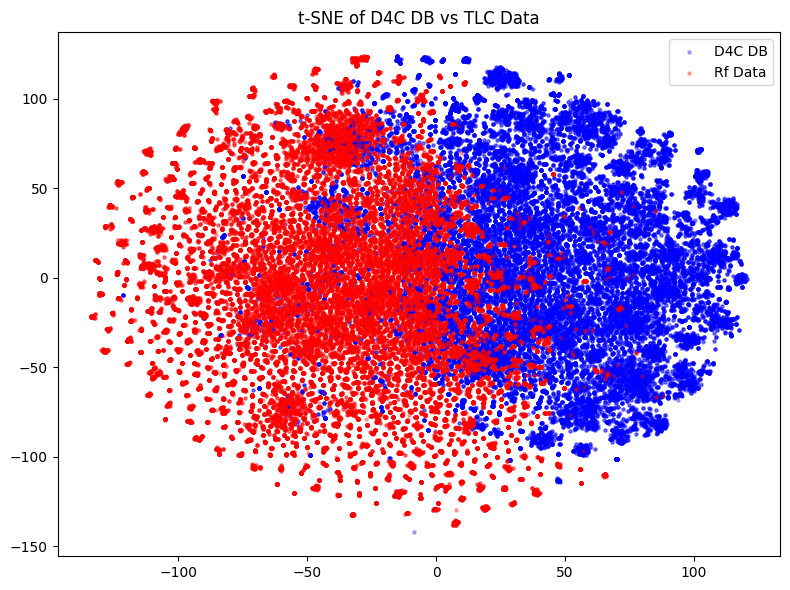

In [21]:
# T-sne
# 기존 D4C 데이터베이스와 비교
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append('../../../')
from functions import bring_DB
d4c_DB = bring_DB()
d4c_mol = d4c_DB['Chromophore_smiles'].drop_duplicates()

total = list(pd.concat([d4c_mol, united['Smiles']], axis=0, ignore_index = True))

generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048, countSimulation=True)
X = []
for smiles in tqdm(total):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = generator.GetFingerprint(mol)
        arr = np.zeros((2048,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        X.append(arr)
    else:
        continue


# t-SNE(2048 to 2)
# Check: t-SNE embedding and visualization
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(np.array(X))

# t-SNE Visualization
boundary = len(d4c_mol)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:boundary, 0], X_tsne[:boundary, 1], c='blue', label='D4C DB', alpha=0.3, s=5)
plt.scatter(X_tsne[boundary:, 0], X_tsne[boundary:, 1], c='red', label='Rf Data', alpha=0.3, s=5)
plt.legend()
plt.title('t-SNE of D4C DB vs TLC Data')

plt.tight_layout()
plt.show()

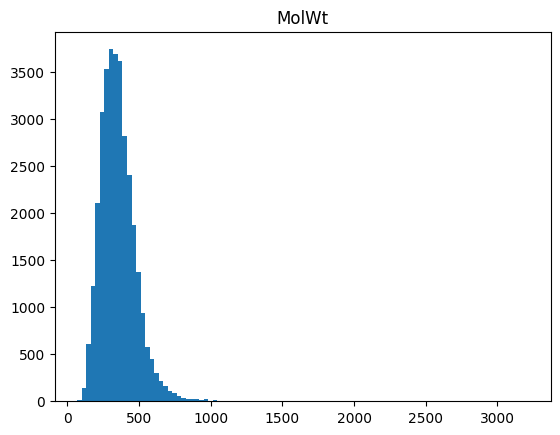

In [ ]:
from rdkit.Chem import Descriptors

molwt_list = [Descriptors.MolWt(Chem.MolFromSmiles(smiles)) for smiles in pd.Series(united['Smiles']).drop_duplicates()]

import matplotlib.pyplot as plt
plt.hist(molwt_list, bins=100)
plt.title('MolWt')
plt.show()

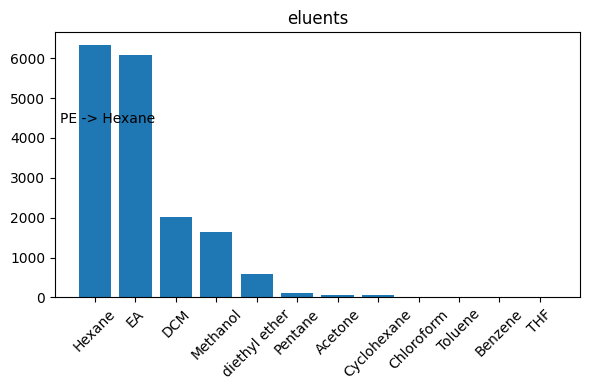

In [ ]:
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

# PE -> Hexane으로 통일
converted_name =['EA',
 'Methanol',
 'Hexane',
 'DCM',
 'diethyl ether',
 'Toluene',
 'Chloroform',
 'Pentane',
 'Acetone',
 'Cyclohexane',
 'Benzene',
 'THF',
 np.nan]

# smiles 변환

elu_smiles = ['O=C(OCC)C', 'CO', 'CCCCCC', 'ClCCl', 'CCOCC', 'CC1=CC=CC=C1',
              'ClC(Cl)Cl', 'CCCCC', 'CC(C)=O', 'C1CCCCC1', 'C1=CC=CC=C1', 'C1CCOC1', None]

elu_smiles_convert = dict(zip(elu_smiles, converted_name))


elu1_name = [elu_smiles_convert[smiles] for smiles in raw['elu1_smiles']]
elu2_name = [elu_smiles_convert[smiles] for smiles in raw['elu2_smiles'] if pd.notna(smiles)]
elu_name = elu1_name + elu2_name 
elu1 = pd.Series(elu_name).value_counts()


plt.figure(figsize=(6,4))
plt.bar(elu1.index, list(elu1))
plt.title('eluents')
plt.xticks(fontsize = 10, rotation = 45)
plt.text(0.01, 0.7, 'PE -> Hexane', ha='left', va='top', transform=plt.gca().transAxes)
plt.tight_layout()  # 저장 전에 레이아웃 조정해서 짤림 방지
plt.savefig('datahist2.png', bbox_inches='tight')
plt.show()

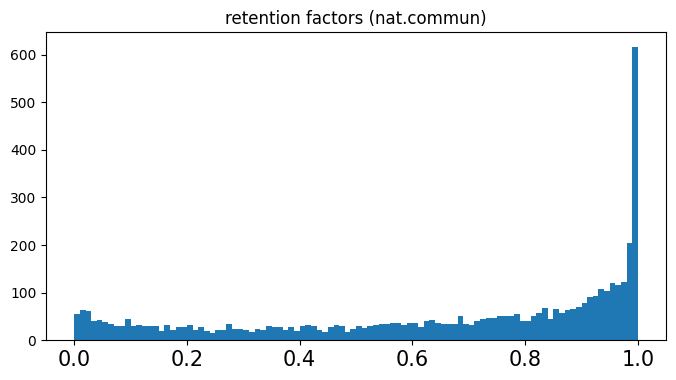

In [ ]:
raw_nat = pd.read_csv('./DB/collecting/primary_processed_PE_hex/nat_commun_raw_PE_hex.csv')
plt.figure(figsize=(8,4))
plt.hist(raw_nat['Rf'], bins=100)
plt.title('retention factors (nat.commun)')
plt.xticks(fontsize = 15)
plt.savefig('datahist3.png')
plt.show()

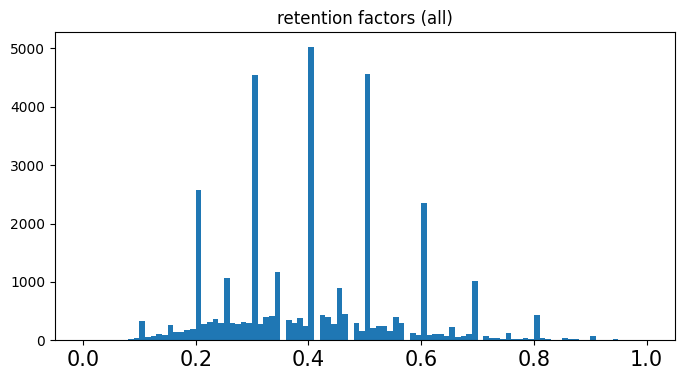

In [51]:
plt.figure(figsize=(8,4))
plt.hist(raw['Rf'], bins=100)
plt.title('retention factors (all)')
plt.xticks(fontsize = 15)
plt.savefig('datahist4.png')
plt.show()

In [ ]:
# compound - eluent pair

ce_pair = pd.Series([set(raw.iloc[i, :3].tolist()) for i in range(len(raw))], name='ce_pair_set')
raw_ce_pair = pd.concat([raw, ce_pair], axis=1)


In [ ]:
ce_pair_group = [raw_ce_pair[raw_ce_pair['ce_pair_set'] == set_] for set_ in raw_ce_pair['ce_pair_set'].drop_duplicates().tolist() 
                 if len(raw_ce_pair[raw_ce_pair['ce_pair_set']==set_])>1 ]

In [ ]:
elu12=pd.concat([raw_ce_pair['elu1_smiles'].drop_duplicates(), raw_ce_pair['elu2_smiles'].drop_duplicates()]).drop_duplicates().tolist()
# None은 polariyt_index = -1로 설정
polarity_index = [0.1, 2.8, 3.1, 4.4, 0.2, 0, 2.4, 5.1, 4.1, 5.1, 2.7, -1, 4.0]
elu12_polarity = dict(zip(elu12, polarity_index))

In [ ]:
# 항상 elu1이 더 높은 polarity를 가지도록 재정렬
groups = []
for a in range(len(ce_pair_group)):
    group = ce_pair_group[a]
    group.index = range(len(group))
    for i in range(len(group)):
        if elu12_polarity[group.loc[i,'elu1_smiles']] < elu12_polarity[group.loc[i,'elu2_smiles']]:
            elu_1, elu_2, ratio_1, ratio_2 = group.loc[i, 'elu1_smiles'], group.loc[i, 'elu2_smiles'], group.loc[i, 'ratio1'], group.loc[i, 'ratio2']
            group.loc[i, 'elu1_smiles'] = elu_2
            group.loc[i, 'elu2_smiles'] = elu_1
            group.loc[i, 'ratio1'] = ratio_2
            group.loc[i, 'ratio2'] = ratio_1
    
    group = group.sort_values(by=['ratio1'])
    groups.append(group)


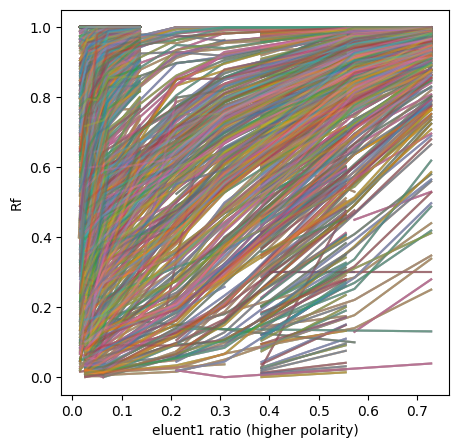

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
for i in range(6):
    for group in groups:
        x_line = group['ratio1']
        y_line = group['Rf']
        plt.plot(x_line, y_line, alpha=0.3)
        plt.xlabel('eluent1 ratio (higher polarity)')
        plt.ylabel('Rf')            
plt.show()

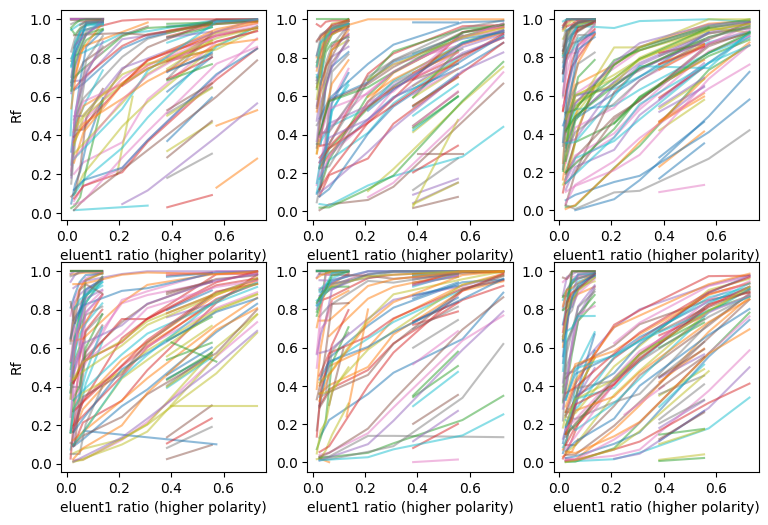

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3, figsize = (9,6))
for i in range(6):
    for idx, group in enumerate(groups[100*i:100*(i+1)]):
        x_line = group['ratio1']
        y_line = group['Rf']
        axs[i//3, i%3].plot(x_line, y_line, alpha=0.5)
        axs[i//3, i%3].set_xlabel('eluent1 ratio (higher polarity)')
        if i%3==0:
            axs[i//3, i%3].set_ylabel('Rf')            
        #axs[0].legend()
fig.show()

In [ ]:
# 지표들

#<H bonding>
# HBA, HBD

#<극성, 소수성>
# rdMolDescriptors.CalcTPSA  --> 극성 표면적
# Descriptors.MolLogP --> (octanol/water 분배계수. 높을수록 소수성, 낮을수록 극성)

#<vdW>
# rdMolDescriptors.CalcLabuteASA  --> Labute의 분자 접근 표면적 (vdW면적 포함됨)
# Descriptors.MolMR --> 몰 굴절률(전자 분극성)
# (vdW은 극성화도 비례하는데 극성화도는 분극성(전자 구름 크고 말랑)에 비례)

#<custom>
# TPSA/CalcLabuteASA (극성면적/전체면적 비율)
# TPSA - CalcLabteASA (비극성 면적)

# Rf값의 위 지표들 중 하나만의 함수로 표현되진 않을 것이므로, 최소한 compound는 eluent를 고정시키고, eluent는 compound를 고정시키고 봐야함. 


In [6]:
raw

Smiles elu1_smiles elu2_smiles    ratio1  \
0              BrC1=C[SH](c2ccccc2)C=N1      CCCCCC   O=C(OCC)C  0.870508   
1                         BrCCCc1ccccc1      CCCCCC       CCOCC  0.445324   
2                         BrCCCc1ccccc1      CCCCCC       CCOCC  0.616228   
3                         BrCCCc1ccccc1      CCCCCC   O=C(OCC)C  0.691437   
4                         BrCCCc1ccccc1      CCCCCC   O=C(OCC)C  0.788794   
...                                 ...         ...         ...       ...   
9024             c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.984422   
9025             c1cnc2c(c1)ccc1cccnc12       ClCCl        None  1.000000   
9026             c1cnc2c(c1)ccc1cccnc12   O=C(OCC)C      CCCCCC  0.728082   
9027             c1cnc2c(c1)ccc1cccnc12   O=C(OCC)C        None  1.000000   
9028  c1csc(-c2cnn(C3OCCc4ccccc43)n2)c1      CCCCCC   O=C(OCC)C  0.788794   

        ratio2        Rf  
0     0.129492  0.450000  
1     0.554676  0.979465  
2     0.383772  0.962609  
3     0.308563  0.983394  
4     0.211206  0.934233  
...        ...       ...  
9024  0.015578  0.038870  
9025  0.000000  0.029154  
9026  0.271918  0.039532  
9027  0.000000  0.035176  
9028  0.211206  0.700000  

[9029 rows x 6 columns]

In [6]:
# Snyder_solvent_polarity_selectivity_all

def solvent_snyder_convert(query_smiles, property):
    s= ['Hex', 'Cyclohexane', 'Carbon sulfide', 'Carbon tetrachloride', 'Isopropyl ether', 'Toluene', 'Chlorobenzene', 
    'Benzene', 'diethyl ether', 'Chloromethane', 'Dichloromethane', 'Tetrahydrofuran', '1,2-Dichloroethane', 'Ethyl methyl ketone', 
    'Acetone', 'Dioxane', 'EA', 'Dimethyl sulfoxide', 'Aniline', 'Nitromethane', 'Acetonitrile', 'Pyridine', '2-Propanol',
    'Ethanol' , 'Methanol', 'Ethylene glycol', 'Acetic acid', 'water']

    elu_list = ['EA', 'Methanol', 'PE', 'Hex', 'DCM', 'diethyl ether', 'Toluene', 'Chloroform', 'Pentane', 'Acetone', 'Cyclohexane', 'Benzene', 'THF', np.nan]
    elu_smiles = ['O=C(OCC)C', 'CO', 'CCCCCC', 'CCCCCC', 'ClCCl', 'CCOCC', 'CC1=CC=CC=C1', 'ClC(Cl)Cl', 'CCCCC', 'CC(C)=O', 'C1CCCCC1', 'C1=CC=CC=C1', 'C1CCOC1', None]
    elu_smiles_convert = dict(zip(elu_list, elu_smiles))

    s_smiles = np.array([elu_smiles_convert[name] if name in elu_list else None for name in s])

    P = [0.1, 0.2, 0.3, 1.6, 2.4, 2.4, 2.7, 2.7, 2.8, 4.1, 3.1, 4.0, 3.5, 4.7, 5.1, 4.8, 4.4, 7.2, 6.3, 6.0, 5.8, 5.3, 3.9, 4.3, 5.1, 6.9, 6.0, 10.2]
    x_e = [0, 0, 0, 0, 0.48, 0.25, 0.23, 0.23, 0.53, 0.25, 0.29, 0.38, 0.30, 0.35, 0.35, 0.36, 0.34, 0.39, 0.32, 0.28, 0.31, 0.41, 0.55, 0.52, 0.48, 0.43, 0.39, 0.37]
    x_d = [0, 0, 0, 0, 0.14, 0.28, 0.33, 0.32, 0.13, 0.41, 0.18, 0.20, 0.21, 0.22, 0.23, 0.24, 0.23, 0.23, 0.32, 0.31, 0.27, 0.22, 0.19, 0.19, 0.22, 0.29, 0.31, 0.37]
    x_n = [0, 0, 0, 0, 0.38, 0.47, 0.44, 0.45, 0.34, 0.33, 0.53, 0.42, 0.49, 0.43, 0.42, 0.40, 0.43, 0.39, 0.36, 0.40, 0.42, 0.36, 0.27, 0.29, 0.31, 0.28, 0.30, 0.25]

    # Check if query_smiles is present in s_smiles, and return the corresponding value or None
    idx = np.where(s_smiles == query_smiles)[0]
    if len(idx) == 0:
        out = None
    else:
        idx = idx[0]
        if property == 'p':
            out = P[idx]
        elif property == 's1':
            out = x_e[idx]
        elif property == 's2':
            out = x_d[idx]
        elif property == 's3':
            out = x_n[idx]
        else:
            out = None

    return out

In [54]:
aa=np.array([4,4,67,8,1,4,6,78])
np.where(aa==1)[0][0]

4

In [46]:
# compound특성에 대해 plot (동일 eluent)

In [ ]:
def make_extended_raw_snyder(raw_Df, column):
    def safe_mol(smiles):
        return Chem.MolFromSmiles(smiles) if isinstance(smiles, str) and smiles.strip() else None

    extend1 = pd.DataFrame({
        'HBD': [CalcNumHBD(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'HBA': [CalcNumHBA(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'CalcTPSA': [rdMolDescriptors.CalcTPSA(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'MolLogP': [Descriptors.MolLogP(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'CalcLabuteASA': [rdMolDescriptors.CalcLabuteASA(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'MolMR': [Descriptors.MolMR(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]]
    })

    extend2 = pd.DataFrame({
        'TPSA_ratio': extend1.apply(
            lambda row: row['CalcTPSA'] / row['CalcLabuteASA']
            if row['CalcTPSA'] is not None and row['CalcLabuteASA'] not in (None, 0)
            else None, axis=1),
        'HBA+HBD': extend1.apply(
            lambda row: row['HBD'] + row['HBA']
            if row['HBD'] is not None and row['HBA'] is not None
            else None, axis=1)
    })

    extend_snyder = pd.DataFrame({
        'polaraity_index' : [solvent_snyder_convert(smiles, 'p') for smiles in raw_Df[column]],
        's1' : [solvent_snyder_convert(smiles, 's1') for smiles in raw_Df[column]],
        's2' : [solvent_snyder_convert(smiles, 's2') for smiles in raw_Df[column]],
        's3' : [solvent_snyder_convert(smiles, 's3') for smiles in raw_Df[column]]
    })

    raw_extended = pd.concat([raw_Df, extend1, extend2, extend_snyder], axis=1)
    return raw_extended

In [3]:
def make_extended_raw(raw_Df, column):
    def safe_mol(smiles):
        return Chem.MolFromSmiles(smiles) if isinstance(smiles, str) and smiles.strip() else None

    extend = pd.DataFrame({
        'HBD': [CalcNumHBD(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'HBA': [CalcNumHBA(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'CalcTPSA': [rdMolDescriptors.CalcTPSA(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'MolLogP': [Descriptors.MolLogP(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'CalcLabuteASA': [rdMolDescriptors.CalcLabuteASA(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]],
        'MolMR': [Descriptors.MolMR(safe_mol(smiles)) if safe_mol(smiles) else None for smiles in raw_Df[column]]
    })

    extend2 = pd.DataFrame({
        'TPSA_ratio': extend.apply(
            lambda row: row['CalcTPSA'] / row['CalcLabuteASA']
            if row['CalcTPSA'] is not None and row['CalcLabuteASA'] not in (None, 0)
            else None, axis=1),
        'HBA+HBD': extend.apply(
            lambda row: row['HBD'] + row['HBA']
            if row['HBD'] is not None and row['HBA'] is not None
            else None, axis=1)
    })

    extend1 =  extend.iloc[:,:3]
    extend3 = extend.iloc[:, 3:]

    raw_extended = pd.concat([raw_Df, extend1, extend2, extend3], axis=1)
    return raw_extended

In [ ]:
raw_compound_extended = make_extended_raw(raw, 'Smiles')

reverse_ratio_idx = raw_compound_extended[raw_compound_extended['ratio1']<raw_compound_extended['ratio2']].index
for i in reverse_ratio_idx:
    ratio1 = raw_compound_extended.loc[i,'ratio1']
    ratio2 = raw_compound_extended.loc[i,'ratio2']
    raw_compound_extended.loc[i,'ratio1'] = ratio2
    raw_compound_extended.loc[i,'ratio2'] = ratio1


In [ ]:
er_list = ['_'.join(map(str,raw_compound_extended.iloc[i,1:5])) for i in range(len(raw_compound_extended))]
raw_compound_extended['er_list'] = er_list

In [ ]:
raw_compound_extended

Smiles elu1_smiles elu2_smiles    ratio1  \
0              BrC1=C[SH](c2ccccc2)C=N1      CCCCCC   O=C(OCC)C  0.870508   
1                         BrCCCc1ccccc1      CCCCCC       CCOCC  0.554676   
2                         BrCCCc1ccccc1      CCCCCC       CCOCC  0.616228   
3                         BrCCCc1ccccc1      CCCCCC   O=C(OCC)C  0.691437   
4                         BrCCCc1ccccc1      CCCCCC   O=C(OCC)C  0.788794   
...                                 ...         ...         ...       ...   
9024             c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.984422   
9025             c1cnc2c(c1)ccc1cccnc12       ClCCl        None  1.000000   
9026             c1cnc2c(c1)ccc1cccnc12   O=C(OCC)C      CCCCCC  0.728082   
9027             c1cnc2c(c1)ccc1cccnc12   O=C(OCC)C        None  1.000000   
9028  c1csc(-c2cnn(C3OCCc4ccccc43)n2)c1      CCCCCC   O=C(OCC)C  0.788794   

        ratio2        Rf  HBD  HBA  CalcTPSA  MolLogP  CalcLabuteASA   MolMR  \
0     0.129492  0.450000    1    1     12.36   3.2824      82.684819  59.196   
1     0.445324  0.979465    0    0      0.00   3.0141      70.393777  48.557   
2     0.383772  0.962609    0    0      0.00   3.0141      70.393777  48.557   
3     0.308563  0.983394    0    0      0.00   3.0141      70.393777  48.557   
4     0.211206  0.934233    0    0      0.00   3.0141      70.393777  48.557   
...        ...       ...  ...  ...       ...      ...            ...     ...   
9024  0.015578  0.038870    0    2     25.78   2.7830      81.234028  57.044   
9025  0.000000  0.029154    0    2     25.78   2.7830      81.234028  57.044   
9026  0.271918  0.039532    0    2     25.78   2.7830      81.234028  57.044   
9027  0.000000  0.035176    0    2     25.78   2.7830      81.234028  57.044   
9028  0.211206  0.700000    0    5     39.94   3.1262     120.183830  77.572   

      TPSA_ratio  HBA+HBD                                            er_list  
0       0.149483      2.0  CCCCCC_O=C(OCC)C_0.8705081641293182_0.12949183...  
1       0.000000      0.0  CCCCCC_CCOCC_0.5546756788357236_0.445324321164...  
2       0.000000      0.0  CCCCCC_CCOCC_0.6162278887833084_0.383772111216...  
3       0.000000      0.0  CCCCCC_O=C(OCC)C_0.6914372153256559_0.30856278...  
4       0.000000      0.0  CCCCCC_O=C(OCC)C_0.7887938335683486_0.21120616...  
...          ...      ...                                                ...  
9024    0.317355      2.0   ClCCl_CO_0.9844224412537776_0.015577558746222327  
9025    0.317355      2.0                                 ClCCl_None_1.0_0.0  
9026    0.317355      2.0  O=C(OCC)C_CCCCCC_0.7280821636863829_0.27191783...  
9027    0.317355      2.0                             O=C(OCC)C_None_1.0_0.0  
9028    0.332324      5.0  CCCCCC_O=C(OCC)C_0.7887942334032438_0.21120576...  

[9029 rows x 15 columns]

In [ ]:
value_count_er = raw_compound_extended['er_list'].drop_duplicates()
value_count_er.index = range(len(value_count_er))
er_group_list = [raw_compound_extended[raw_compound_extended['er_list']==er] for er in value_count_er]

/tmp/ipykernel_3258820/1214481017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df.sort_values(by=column_name, inplace=True)


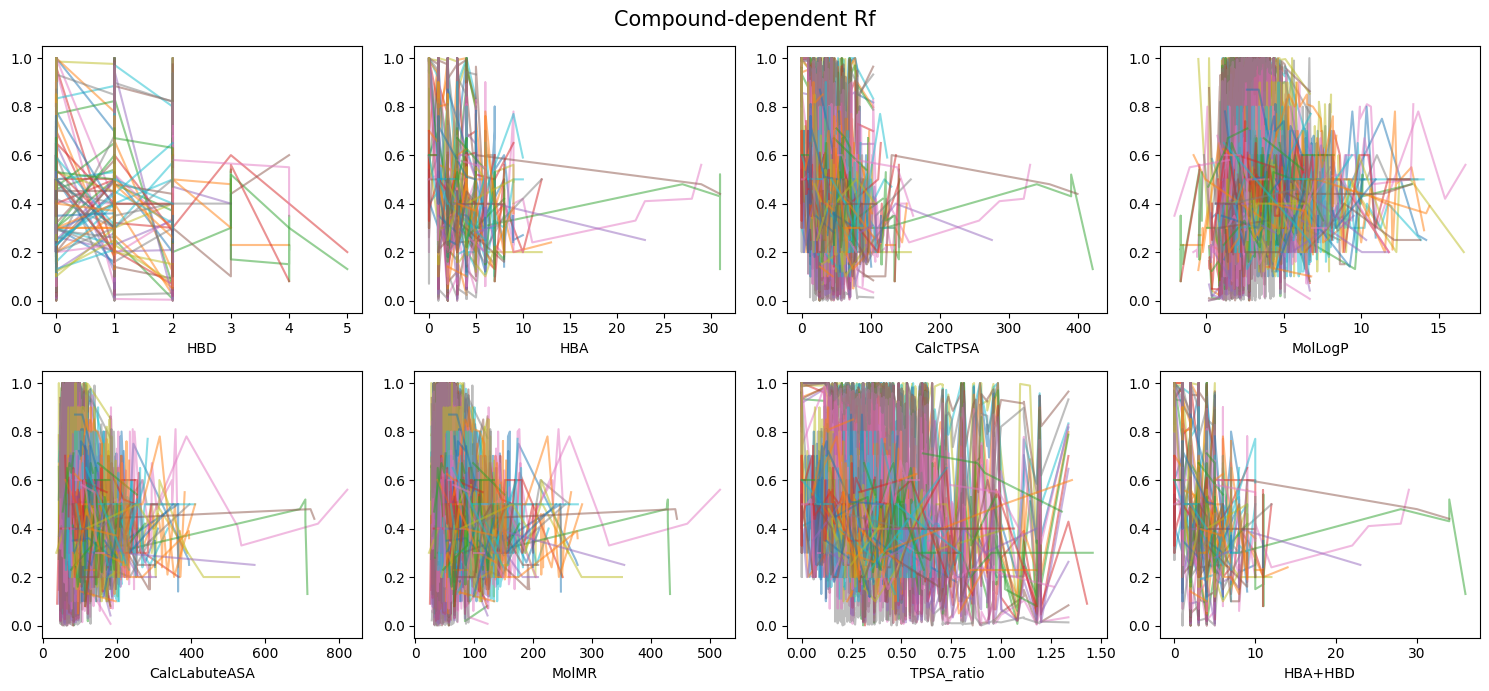

In [ ]:
fig, axs = plt.subplots(2,4, figsize = (15,7))

for idx, column_name in enumerate(raw_compound_extended.columns[6:-1]):
    for group_df in er_group_list:
        group_df.sort_values(by=column_name, inplace=True)
        x_line = group_df[column_name]
        y_line = group_df['Rf']
        axs[idx//4, idx%4].plot(x_line, y_line, alpha=0.5)
        axs[idx//4, idx%4].set_xlabel(column_name)
# This line is incorrect. The correct way to set a title for a matplotlib Figure is:
fig.suptitle('Compound-dependent Rf', fontsize=15)
plt.tight_layout()  # 저장 전에 레이아웃 조정해서 짤림 방지
plt.savefig('data_analysis.png',dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# eluent특성에 대해 plot (동일 compound)

In [23]:
raw_eluent1 = make_extended_raw(raw, 'elu1_smiles').iloc[:,6:].fillna(0).multiply(raw['ratio1'], axis=0)
raw_eluent2 = make_extended_raw(raw, 'elu2_smiles').iloc[:,6:].fillna(0).multiply(raw['ratio2'], axis=0)
raw_eluent_extended = pd.concat([raw, (raw_eluent1+raw_eluent2)], axis=1)

In [24]:
compound_counts = raw_eluent_extended['Smiles'].value_counts()
multi_compounds = compound_counts[compound_counts > 1].index
compound_group_list = [group for name, group in raw_eluent_extended.groupby('Smiles') if name in multi_compounds]

In [25]:
raw_eluent_extended

Smiles elu1_smiles elu2_smiles    ratio1  \
0              BrC1=C[SH](c2ccccc2)C=N1      CCCCCC   O=C(OCC)C  0.870508   
1                         BrCCCc1ccccc1      CCCCCC       CCOCC  0.445324   
2                         BrCCCc1ccccc1      CCCCCC       CCOCC  0.616228   
3                         BrCCCc1ccccc1      CCCCCC   O=C(OCC)C  0.691437   
4                         BrCCCc1ccccc1      CCCCCC   O=C(OCC)C  0.788794   
...                                 ...         ...         ...       ...   
9024             c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.984422   
9025             c1cnc2c(c1)ccc1cccnc12       ClCCl        None  1.000000   
9026             c1cnc2c(c1)ccc1cccnc12   O=C(OCC)C      CCCCCC  0.728082   
9027             c1cnc2c(c1)ccc1cccnc12   O=C(OCC)C        None  1.000000   
9028  c1csc(-c2cnn(C3OCCc4ccccc43)n2)c1      CCCCCC   O=C(OCC)C  0.788794   

        ratio2        Rf       HBD       HBA   CalcTPSA   MolLogP  \
0     0.129492  0.450000  0.000000  0.258984   3.405635  2.325389   
1     0.554676  0.979465  0.000000  0.554676   5.119657  1.730292   
2     0.383772  0.962609  0.000000  0.383772   3.542217  1.994133   
3     0.308563  0.983394  0.000000  0.617126   8.115201  1.964167   
4     0.211206  0.934233  0.000000  0.422412   5.554722  2.160555   
...        ...       ...       ...       ...        ...       ...   
9024  0.015578  0.038870  0.015578  0.015578   0.315134  1.393258   
9025  0.000000  0.029154  0.000000  0.000000   0.000000  1.421500   
9026  0.271918  0.039532  0.000000  1.456164  19.148561  1.117913   
9027  0.000000  0.035176  0.000000  2.000000  26.300000  0.569400   
9028  0.211206  0.700000  0.000000  0.422412   5.554712  2.160556   

      CalcLabuteASA      MolMR  TPSA_ratio   HBA+HBD  polaraity_index  \
0         40.116591  28.843646    0.091773  0.258984         0.656815   
1         36.339364  25.573286    0.155388  0.554676         1.597624   
2         37.641023  26.880527    0.107511  0.383772         1.136185   
3         39.497934  27.499002    0.218685  0.617126         1.426820   
4         39.834283  28.230053    0.149686  0.422412         1.008187   
...             ...        ...         ...       ...              ...   
9024      29.099466  16.441678    0.023286  0.031155         0.079446   
9025      29.345783  16.573000    0.000000  0.000000         0.000000   
9026      38.048571  24.348831    0.516007  1.456164         3.230753   
9027      37.109145  22.307000    0.708720  2.000000         4.400000   
9028      39.834284  28.230056    0.149686  0.422412         1.008185   

            s1        s2        s3  
0     0.044027  0.029783  0.055681  
1     0.293978  0.072108  0.188590  
2     0.203399  0.049890  0.130483  
3     0.104911  0.070969  0.132682  
4     0.071810  0.048577  0.090819  
...        ...       ...       ...  
9024  0.007477  0.003427  0.004829  
9025  0.000000  0.000000  0.000000  
9026  0.247548  0.167459  0.313075  
9027  0.340000  0.230000  0.430000  
9028  0.071810  0.048577  0.090818  

[9029 rows x 18 columns]

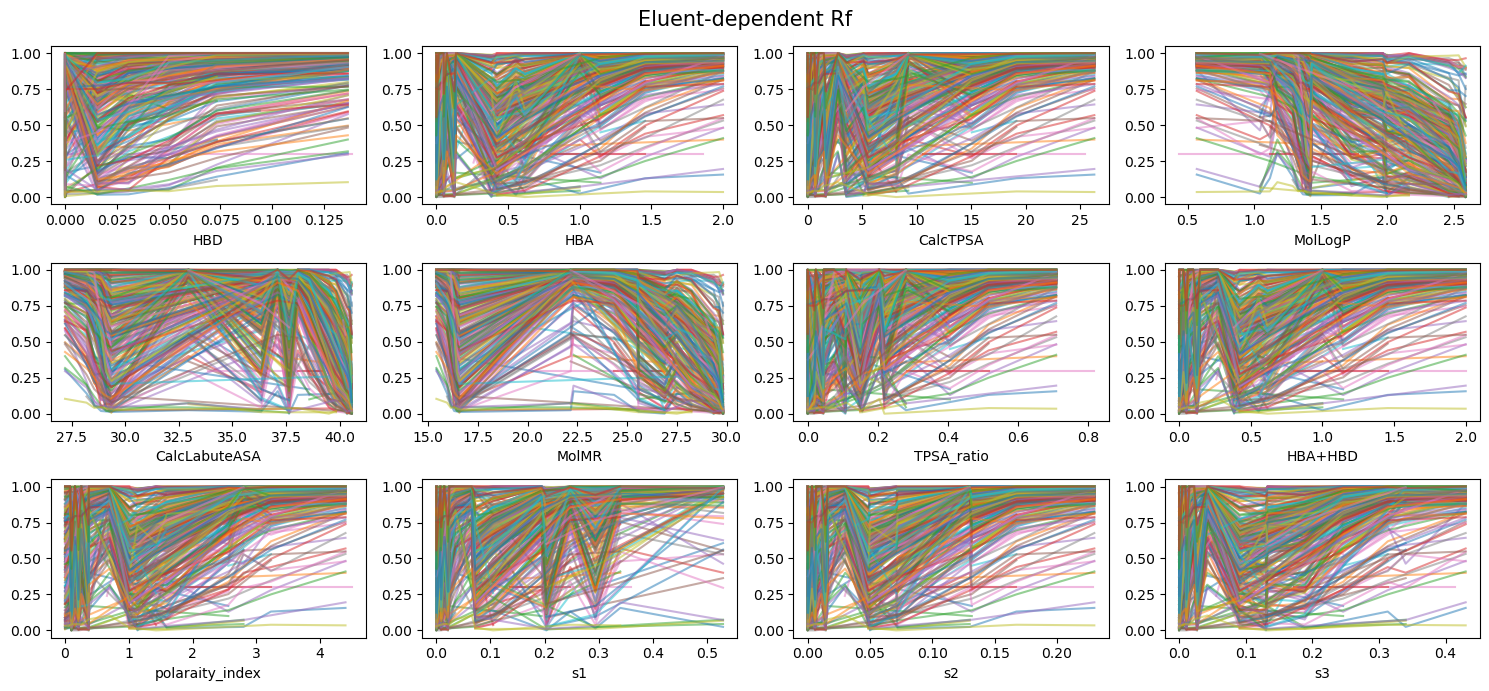

In [65]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(3,4, figsize = (15,7))

for idx,column_name in enumerate(raw_eluent_extended.columns[6:]):
    for group in compound_group_list:
        group.sort_values(by = column_name, inplace = True)
        x_line = group[column_name]
        y_line = group['Rf']
        axs[idx//4, idx%4].plot(x_line, y_line, alpha=0.5)
        axs[idx//4, idx%4].set_xlabel(column_name)
plt.suptitle('Eluent-dependent Rf', fontsize=15)
plt.tight_layout()  # 저장 전에 레이아웃 조정해서 짤림 방지
#plt.savefig('data_analysis2.png', dpi=400, bbox_inches='tight')
plt.show()



In [ ]:
# eluent특성에 대해 plot (동일 compound, 동일 eluent 조합 but 비율만 변화)

In [26]:
raw_eluent_extended

Smiles elu1_smiles elu2_smiles    ratio1  \
0              BrC1=C[SH](c2ccccc2)C=N1      CCCCCC   O=C(OCC)C  0.870508   
1                         BrCCCc1ccccc1      CCCCCC       CCOCC  0.445324   
2                         BrCCCc1ccccc1      CCCCCC       CCOCC  0.616228   
3                         BrCCCc1ccccc1      CCCCCC   O=C(OCC)C  0.691437   
4                         BrCCCc1ccccc1      CCCCCC   O=C(OCC)C  0.788794   
...                                 ...         ...         ...       ...   
9024             c1cnc2c(c1)ccc1cccnc12       ClCCl          CO  0.984422   
9025             c1cnc2c(c1)ccc1cccnc12       ClCCl        None  1.000000   
9026             c1cnc2c(c1)ccc1cccnc12   O=C(OCC)C      CCCCCC  0.728082   
9027             c1cnc2c(c1)ccc1cccnc12   O=C(OCC)C        None  1.000000   
9028  c1csc(-c2cnn(C3OCCc4ccccc43)n2)c1      CCCCCC   O=C(OCC)C  0.788794   

        ratio2        Rf       HBD       HBA   CalcTPSA   MolLogP  \
0     0.129492  0.450000  0.000000  0.258984   3.405635  2.325389   
1     0.554676  0.979465  0.000000  0.554676   5.119657  1.730292   
2     0.383772  0.962609  0.000000  0.383772   3.542217  1.994133   
3     0.308563  0.983394  0.000000  0.617126   8.115201  1.964167   
4     0.211206  0.934233  0.000000  0.422412   5.554722  2.160555   
...        ...       ...       ...       ...        ...       ...   
9024  0.015578  0.038870  0.015578  0.015578   0.315134  1.393258   
9025  0.000000  0.029154  0.000000  0.000000   0.000000  1.421500   
9026  0.271918  0.039532  0.000000  1.456164  19.148561  1.117913   
9027  0.000000  0.035176  0.000000  2.000000  26.300000  0.569400   
9028  0.211206  0.700000  0.000000  0.422412   5.554712  2.160556   

      CalcLabuteASA      MolMR  TPSA_ratio   HBA+HBD  polaraity_index  \
0         40.116591  28.843646    0.091773  0.258984         0.656815   
1         36.339364  25.573286    0.155388  0.554676         1.597624   
2         37.641023  26.880527    0.107511  0.383772         1.136185   
3         39.497934  27.499002    0.218685  0.617126         1.426820   
4         39.834283  28.230053    0.149686  0.422412         1.008187   
...             ...        ...         ...       ...              ...   
9024      29.099466  16.441678    0.023286  0.031155         0.079446   
9025      29.345783  16.573000    0.000000  0.000000         0.000000   
9026      38.048571  24.348831    0.516007  1.456164         3.230753   
9027      37.109145  22.307000    0.708720  2.000000         4.400000   
9028      39.834284  28.230056    0.149686  0.422412         1.008185   

            s1        s2        s3  
0     0.044027  0.029783  0.055681  
1     0.293978  0.072108  0.188590  
2     0.203399  0.049890  0.130483  
3     0.104911  0.070969  0.132682  
4     0.071810  0.048577  0.090819  
...        ...       ...       ...  
9024  0.007477  0.003427  0.004829  
9025  0.000000  0.000000  0.000000  
9026  0.247548  0.167459  0.313075  
9027  0.340000  0.230000  0.430000  
9028  0.071810  0.048577  0.090818  

[9029 rows x 18 columns]

In [27]:
ce_pair = pd.Series(['_'.join(map(str,raw_eluent_extended.iloc[i, :3])) for i in range(len(raw_eluent_extended))], name='ce_pair_set')
raw_eluent_extended_ce_pair = pd.concat([raw_eluent_extended, ce_pair], axis=1)

unique_ce_pair = ce_pair.value_counts()
ce_pair_use = unique_ce_pair[unique_ce_pair>1].index
pair_group_list = [pair_group for name, pair_group in raw_eluent_extended_ce_pair.groupby('ce_pair_set') if name in ce_pair_use]


In [55]:
import numpy as np
g1 = [np.var(g['Rf']) for g in pair_group_list if len(g) >5]
#g_ = [g['Rf'] for g in pair_group_list if len(g) > 4]
g2 = [g['ratio1'] for g in pair_group_list if len(g) >5]
print(g1)


[0.03884450991380555, 0.03755226138533333, 0.06118141884413889]


In [53]:
gg=[g for g in pair_group_list if len(g) <3]

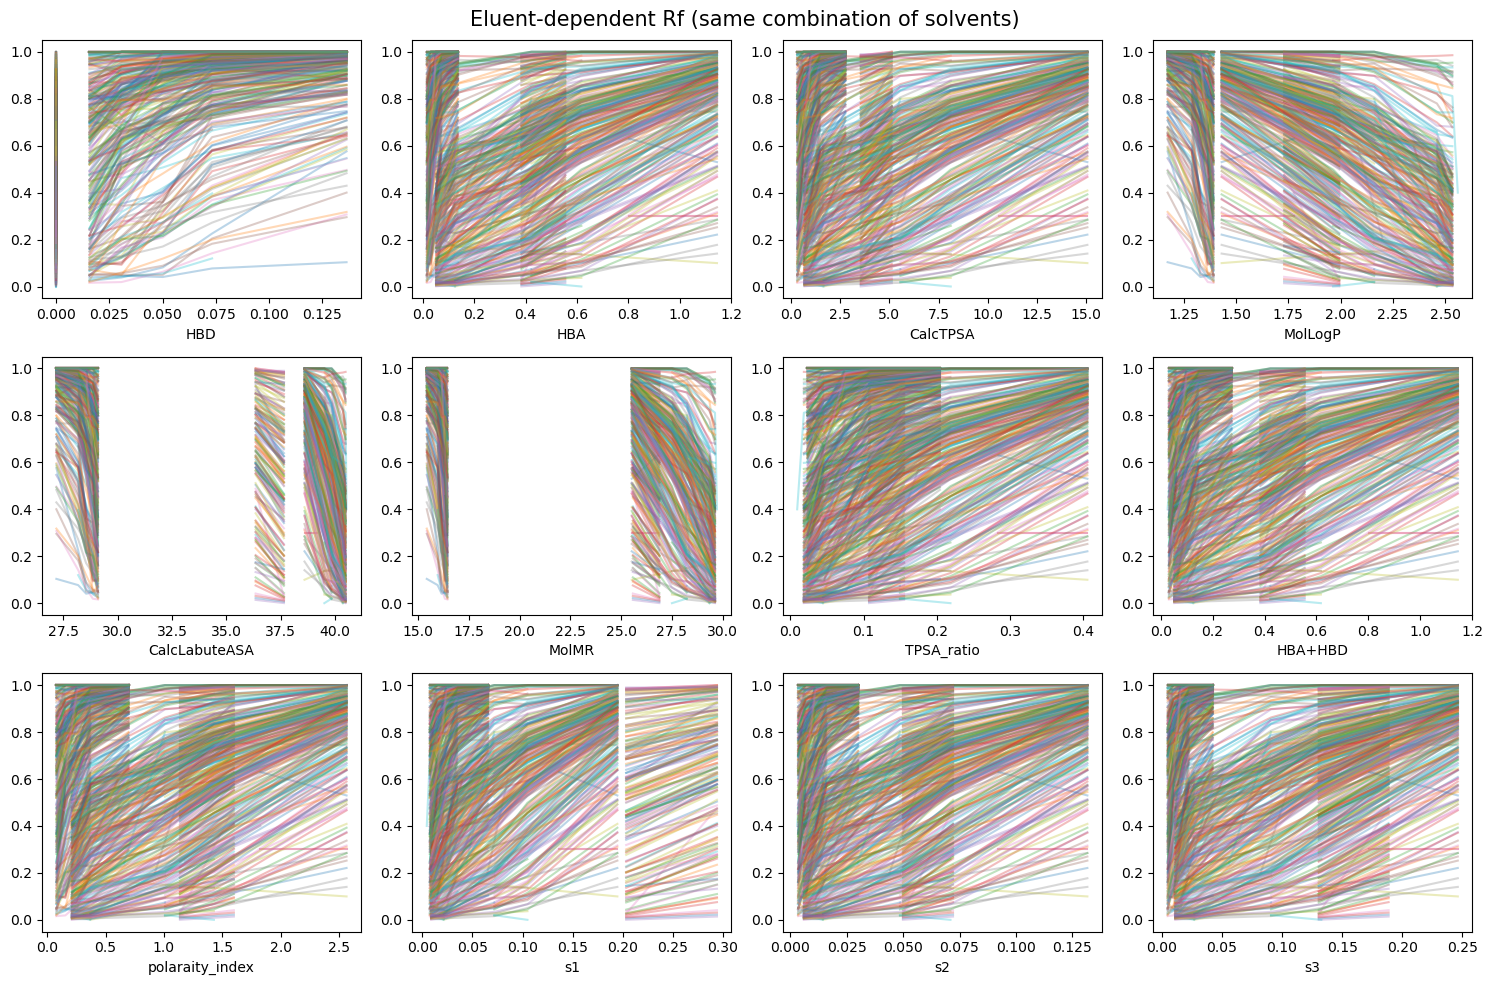

In [71]:
fig,axs = plt.subplots(3,4, figsize = (15,10))

for idx,column_name in enumerate(raw_eluent_extended.columns[6:]):
    for group in pair_group_list:
        group.sort_values(by = column_name)
        x_line = group[column_name]
        y_line = group['Rf']
        axs[idx//4, idx%4].plot(x_line, y_line, alpha=0.3)
        axs[idx//4, idx%4].set_xlabel(column_name)
plt.suptitle('Eluent-dependent Rf (same combination of solvents)', fontsize=15)
plt.tight_layout()  # 저장 전에 레이아웃 조정해서 짤림 방지
#plt.savefig('data_analysis3.png', dpi=400, bbox_inches='tight')
plt.show()


In [ ]:
# 예측된 valid set이 경향성 (동일 compound, 동일 용매 조합, 용매 비율 변화화)

In [ ]:
valid_pred = pd.read_csv('./predicted_values/valid_pred.csv')
valid_pred.columns = ['prediction']
valid_DB = pd.read_csv('./DB/Rf/raw_DB_valid.csv')
valid_set = pd.concat([valid_DB, valid_pred], axis=1)


In [ ]:
valid_eluent1 = make_extended_raw(valid_set, 'elu1_smiles').iloc[:,7:].fillna(0).multiply(valid_set['ratio1'], axis=0)
valid_eluent2 = make_extended_raw(valid_set, 'elu2_smiles').iloc[:,7:].fillna(0).multiply(valid_set['ratio2'], axis=0)
valid_eluent_extended = pd.concat([valid_set, (valid_eluent1+valid_eluent2)], axis=1)

In [ ]:
valid_ce_pair = pd.Series(['_'.join(map(str,valid_eluent_extended.iloc[i, :3])) for i in range(len(valid_eluent_extended))], name='ce_pair_set')
valid_eluent_extended_ce_pair = pd.concat([valid_eluent_extended, valid_ce_pair], axis=1)

valid_unique_ce_pair = valid_ce_pair.value_counts()
valid_ce_pair_use = valid_unique_ce_pair[valid_unique_ce_pair>1].index
pair_group_list = [pair_group for name, pair_group in valid_eluent_extended_ce_pair.groupby('ce_pair_set') if name in valid_ce_pair_use]


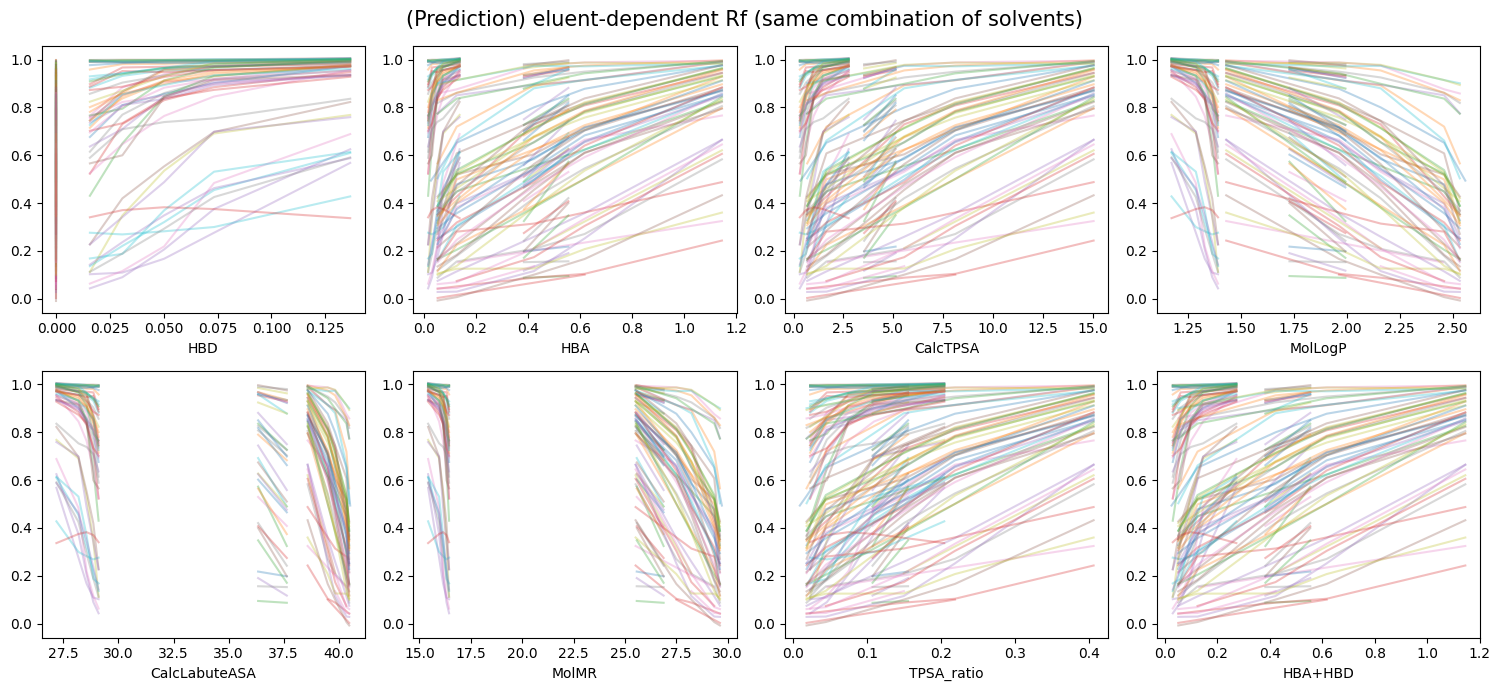

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,4, figsize = (15,7))

for idx,column_name in enumerate(valid_eluent_extended.columns[7:]):
    for group in pair_group_list:
        group.sort_values(by = column_name)
        x_line = group[column_name]
        y_line = group['prediction']
        axs[idx//4, idx%4].plot(x_line, y_line, alpha=0.3)
        axs[idx//4, idx%4].set_xlabel(column_name)
plt.suptitle('(Prediction) eluent-dependent Rf (same combination of solvents)', fontsize=15)
plt.tight_layout()  # 저장 전에 레이아웃 조정해서 짤림 방지
plt.savefig('(prediction)data_analysis3.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# valid set 에러 큰 애들만 경향서 추적

0.6634220200000001


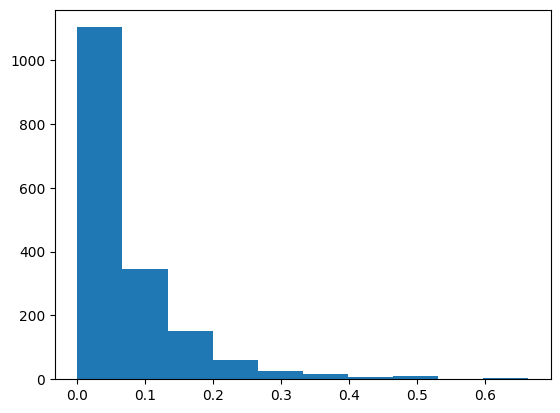

In [ ]:
valid_error = abs(valid_eluent_extended['Rf'] - valid_eluent_extended['prediction'])
print(max(valid_error))
plt.hist(valid_error)
plt.show()

In [ ]:
valid_error.name = 'error'
valid_eluent_extended_error = pd.concat([valid_eluent_extended, valid_error], axis=1)
valid_eluent_extended_error

Smiles elu1_smiles elu2_smiles    ratio1  \
0                  BrCc1cccc(CBr)c1      CCCCCC       CCOCC  0.445324   
1                  BrCc1cccc(CBr)c1      CCCCCC       CCOCC  0.616228   
2                  BrCc1cccc(CBr)c1      CCCCCC   O=C(OCC)C  0.427572   
3                  BrCc1cccc(CBr)c1      CCCCCC   O=C(OCC)C  0.691437   
4                  BrCc1cccc(CBr)c1      CCCCCC   O=C(OCC)C  0.788794   
...                             ...         ...         ...       ...   
1714  c1ccc2c(c1)CCOC2n1nnc2ccccc21      CCCCCC   O=C(OCC)C  0.749234   
1715       c1ccc2cc(N3CCCCC3)ccc2c1      CCCCCC   O=C(OCC)C  0.934176   
1716                 c1ccc2ccccc2c1      CCCCCC   O=C(OCC)C  0.986789   
1717       c1ccc2nc(C3CCCCC3)cnc2c1      CCCCCC   O=C(OCC)C  0.934176   
1718       c1ccc2nc(N3CCOCC3)ccc2c1      CCCCCC   O=C(OCC)C  0.881928   

        ratio2        Rf  prediction  HBD       HBA   CalcTPSA   MolLogP  \
0     0.554676  0.892575    0.967242  0.0  0.554676   5.119657  1.730292   
1     0.383772  0.830672    0.922832  0.0  0.383772   3.542217  1.994133   
2     0.572428  0.995327    0.988883  0.0  1.144856  15.054863  1.431898   
3     0.308563  0.899026    0.913405  0.0  0.617126   8.115201  1.964167   
4     0.211206  0.805533    0.891882  0.0  0.422412   5.554722  2.160555   
...        ...       ...         ...  ...       ...        ...       ...   
1714  0.250766  0.300000    0.722940  0.0  0.501533   6.595156  2.080754   
1715  0.065824  0.500000    0.595888  0.0  0.131649   1.731182  2.453819   
1716  0.013211  0.700000    0.554357  0.0  0.026422   0.347450  2.559951   
1717  0.065824  0.380000    0.371036  0.0  0.131649   1.731182  2.453819   
1718  0.118072  0.420000    0.333162  0.0  0.236143   3.105283  2.348426   

      CalcLabuteASA      MolMR  TPSA_ratio   HBA+HBD     error  
0         36.339364  25.573286    0.155388  0.554676  0.074667  
1         37.641023  26.880527    0.107511  0.383772  0.092160  
2         38.586327  25.517636    0.405691  1.144856  0.006444  
3         39.497934  27.499002    0.218685  0.617126  0.014379  
4         39.834283  28.230053    0.149686  0.422412  0.086349  
...             ...        ...         ...       ...       ...  
1714      39.697610  27.932995    0.177723  0.501533  0.422940  
1715      40.336550  29.321725    0.046651  0.131649  0.095888  
1716      40.518320  29.716798    0.009363  0.026422  0.145643  
1717      40.336550  29.321725    0.046651  0.131649  0.008964  
1718      40.156046  28.929400    0.083680  0.236143  0.086838  

[1719 rows x 16 columns]

In [ ]:
valid_ce_pair = pd.Series(['_'.join(map(str,valid_eluent_extended_error.iloc[i, :3])) for i in range(len(valid_eluent_extended_error))], name='ce_pair_set')
valid_eluent_extended_ce_pair = pd.concat([valid_eluent_extended_error, valid_ce_pair], axis=1)

valid_unique_ce_pair = valid_ce_pair.value_counts()
valid_ce_pair_use = valid_unique_ce_pair[valid_unique_ce_pair>1].index
pair_group_list = [pair_group for name, pair_group in valid_eluent_extended_ce_pair.groupby('ce_pair_set') if name in valid_ce_pair_use]

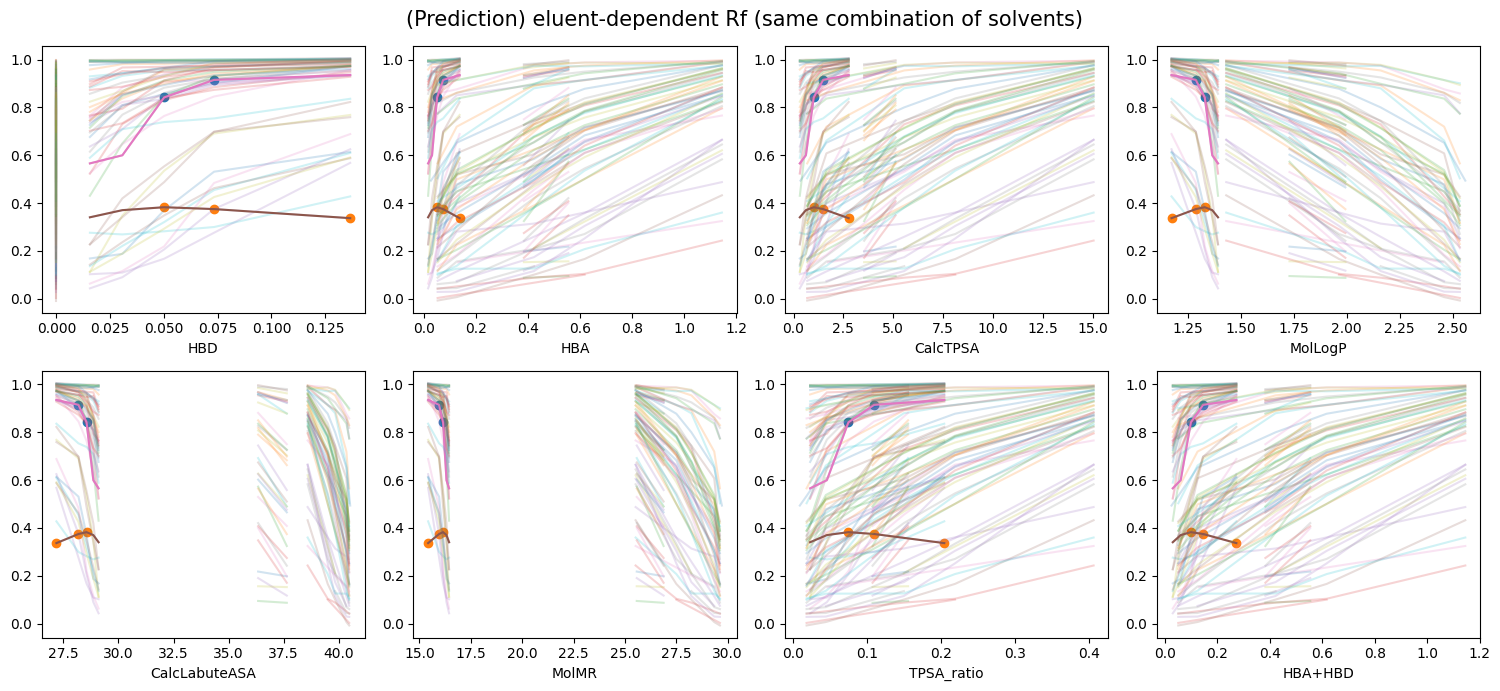

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,4, figsize = (15,7))

for idx,column_name in enumerate(valid_eluent_extended_error.columns[7:-1]):
    for group in pair_group_list:
        group.sort_values(by = column_name)
        x_line = group[column_name]
        y_line = group['prediction']
        axs[idx//4, idx%4].plot(x_line, y_line, alpha=0.2)
        axs[idx//4, idx%4].set_xlabel(column_name)
        group_out = group[group['error']>=0.5]
        if not group_out.empty:
            import random
            import matplotlib


            x_line_out = group[column_name]
            y_line_out = group['prediction']
            x_out = group_out[column_name]
            y_out = group_out['prediction']
            axs[idx//4, idx%4].plot(x_line_out, y_line_out)
            axs[idx//4, idx%4].scatter(x_out, y_out)



plt.suptitle('(Prediction) eluent-dependent Rf (same combination of solvents)', fontsize=15)
plt.tight_layout()  # 저장 전에 레이아웃 조정해서 짤림 방지
#plt.savefig('(prediction_error)data_analysis_0.5.png', dpi=400, bbox_inches='tight')
plt.show()

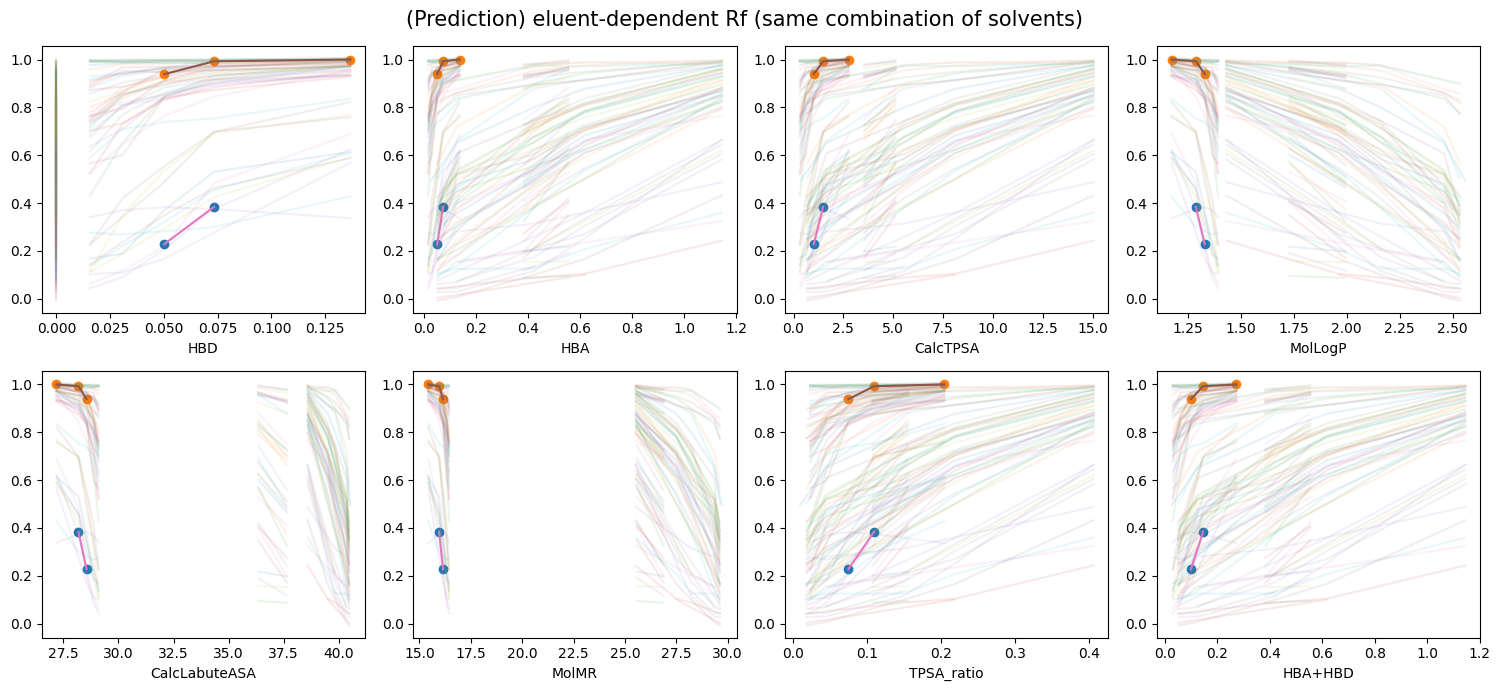

In [ ]:
# 위 plot에 있는 데이터들의 실제 label이 경향을 따르는 지 체크

import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,4, figsize = (15,7))

for idx,column_name in enumerate(valid_eluent_extended_error.columns[7:-1]):
    for group in pair_group_list:
        group.sort_values(by = column_name)
        x_line = group[column_name]
        y_line = group['prediction']
        axs[idx//4, idx%4].plot(x_line, y_line, alpha=0.1)
        group_out = group[group['error']>=0.5]
        if not group_out.empty:
            x_line_label = group_out[column_name]
            y_line_label = group_out['Rf']
            x_out = group_out[column_name]
            y_out = group_out['Rf']
            color = 'tab:orange'
            axs[idx//4, idx%4].plot(x_line_label, y_line_label)
            axs[idx//4, idx%4].scatter(x_out, y_out)
            axs[idx//4, idx%4].set_xlabel(column_name)


plt.suptitle(' eluent-dependent Rf (same combination of solvents)', fontsize=15)
plt.tight_layout()  # 저장 전에 레이아웃 조정해서 짤림 방지
plt.savefig('(label)data_analysis_0.5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
error_extended_sort = valid_eluent_extended_error.sort_values(by='error', ascending=False)


In [ ]:
error_compound_df = error_extended_sort[error_extended_sort['error']>0.6]
error_compound = list(error_compound_df['Smiles'].drop_duplicates())

In [ ]:
error_compound_df

Smiles elu1_smiles elu2_smiles    ratio1  \
1615  O=S(=O)(CS(=O)(=O)c1ccccc1)c1ccccc1       ClCCl          CO  0.863379   
1616  O=S(=O)(CS(=O)(=O)c1ccccc1)c1ccccc1       ClCCl          CO  0.926681   
1361                       Nc1ccc(Cl)cc1O       ClCCl          CO  0.949896   

        ratio2        Rf  prediction       HBD       HBA  CalcTPSA   MolLogP  \
1615  0.136621  1.000000    0.336578  0.136621  0.136621  2.763848  1.173806   
1616  0.073319  0.992785    0.374607  0.073319  0.073319  1.483246  1.288572   
1361  0.050104  0.227645    0.841623  0.050104  0.050104  1.013602  1.330662   

      CalcLabuteASA      MolMR  TPSA_ratio   HBA+HBD     error  
1615      27.185487  15.421255    0.204223  0.273243  0.663422  
1616      28.186440  15.954905    0.109598  0.146638  0.618178  
1361      28.553526  16.150614    0.074896  0.100208  0.613978

In [ ]:
from rdkit.Chem.Draw import MolsToGridImage

mols = [Chem.MolFromSmiles(error_compound[i]) for i in range(len(error_compound))]
MolsToGridImage(mols, molsPerRow = 2, subImgSize = (600,600))

In [16]:
pd.read_csv('./predicted_values/only_nat_physics_check_model_5s_8penalty.csv')

0
0     0.268871
1     0.291387
2     0.357398
3     0.434876
4     0.435138
...        ...
4714  0.435888
4715  0.436643
4716  0.433885
4717  0.434449
4718  0.434422

[4719 rows x 1 columns]

In [21]:
# only_D4C 학습 모델 ---예측---> only_nat 데이터
# 예측한 데이터들의 실제 이 경향을 따르는 지 체크

only_nat_physics_pred = pd.read_csv('./predicted_values/only_nat_physics_check_model_5s_8penalty.csv')
only_nat_physics_pred.columns = ['prediction']
valid_DB = pd.read_csv('./DB/Rf/only_nat_raw_DB.csv')

valid_DB = valid_DB.iloc[:, :-8]
valid_set = pd.concat([valid_DB, only_nat_physics_pred], axis=1)

valid_eluent1 = make_extended_raw(valid_set, 'elu1_smiles').iloc[:,7:].fillna(0).multiply(valid_set['ratio1'], axis=0)
valid_eluent2 = make_extended_raw(valid_set, 'elu2_smiles').iloc[:,7:].fillna(0).multiply(valid_set['ratio2'], axis=0)
valid_eluent_extended = pd.concat([valid_set, (valid_eluent1+valid_eluent2)], axis=1)

valid_ce_pair = pd.Series(['_'.join(map(str,valid_eluent_extended.iloc[i, :3])) for i in range(len(valid_eluent_extended))], name='ce_pair_set')
valid_eluent_extended_ce_pair = pd.concat([valid_eluent_extended, valid_ce_pair], axis=1)

valid_unique_ce_pair = valid_ce_pair.value_counts()
valid_ce_pair_use = valid_unique_ce_pair[valid_unique_ce_pair>1].index
pair_group_list = [pair_group for name, pair_group in valid_eluent_extended_ce_pair.groupby('ce_pair_set') if name in valid_ce_pair_use]


In [18]:
valid_eluent_extended

Smiles elu1_smiles elu2_smiles    ratio1    ratio2  \
0       O=C(CCCl)c1ccccc1      CCCCCC         NaN  1.000000  0.000000   
1       O=C(CCCl)c1ccccc1      CCCCCC   O=C(OCC)C  0.973922  0.026078   
2       O=C(CCCl)c1ccccc1      CCCCCC   O=C(OCC)C  0.937260  0.062740   
3       O=C(CCCl)c1ccccc1      CCCCCC   O=C(OCC)C  0.788794  0.211206   
4       O=C(CCCl)c1ccccc1      CCCCCC   O=C(OCC)C  0.691437  0.308563   
...                   ...         ...         ...       ...       ...   
4714  CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.616228  0.383772   
4715  CC1CCC(=O)c2ccccc21      CCCCCC       CCOCC  0.445324  0.554676   
4716  CC1CCC(=O)c2ccccc21       CCOCC         NaN  1.000000  0.000000   
4717     O=C1CCCc2cccnc21      CCCCCC       CCOCC  0.445324  0.554676   
4718     O=C1CCCc2cccnc21       CCOCC         NaN  1.000000  0.000000   

            Rf  prediction  HBD       HBA  CalcTPSA  TPSA_ratio   HBA+HBD  \
0     0.049175    0.268871  0.0  0.000000  0.000000    0.000000  0.000000   
1     0.262708    0.291387  0.0  0.052155  0.685844    0.018482  0.052155   
2     0.410200    0.357398  0.0  0.125479  1.650052    0.044465  0.125479   
3     0.719773    0.434876  0.0  0.422412  5.554722    0.149686  0.422412   
4     0.794856    0.435138  0.0  0.617126  8.115201    0.218685  0.617126   
...        ...         ...  ...       ...       ...         ...       ...   
4714  0.498683    0.435888  0.0  0.383772  3.542217    0.107511  0.383772   
4715  0.662423    0.436643  0.0  0.554676  5.119657    0.155388  0.554676   
4716  0.988897    0.433885  0.0  1.000000  9.230000    0.280142  1.000000   
4717  0.010664    0.434449  0.0  0.554676  5.119657    0.155388  0.554676   
4718  0.067325    0.434422  0.0  1.000000  9.230000    0.280142  1.000000   

       MolLogP  CalcLabuteASA      MolMR  
0     2.586600      40.563962  29.816000  
1     2.533996      40.473868  29.620182  
2     2.460042      40.347208  29.344888  
3     2.160555      39.834283  28.230053  
4     1.964167      39.497934  27.499002  
...        ...            ...        ...  
4714  1.994133      37.641023  26.880527  
4715  1.730292      36.339364  25.573286  
4716  1.042800      32.947623  22.167000  
4717  1.730292      36.339364  25.573286  
4718  1.042800      32.947623  22.167000  

[4719 rows x 15 columns]

In [19]:
pair_group_list[12]

Smiles elu1_smiles elu2_smiles    ratio1    ratio2        Rf  \
4190  BrCc1ccccc1I      CCCCCC       CCOCC  0.445324  0.554676  0.958931   
4191  BrCc1ccccc1I      CCCCCC       CCOCC  0.616228  0.383772  0.906100   

      prediction  HBD       HBA  CalcTPSA  TPSA_ratio   HBA+HBD   MolLogP  \
4190    0.436484  0.0  0.554676  5.119657    0.155388  0.554676  1.730292   
4191    0.435987  0.0  0.383772  3.542217    0.107511  0.383772  1.994133   

      CalcLabuteASA      MolMR                ce_pair_set  
4190      36.339364  25.573286  BrCc1ccccc1I_CCCCCC_CCOCC  
4191      37.641023  26.880527  BrCc1ccccc1I_CCCCCC_CCOCC

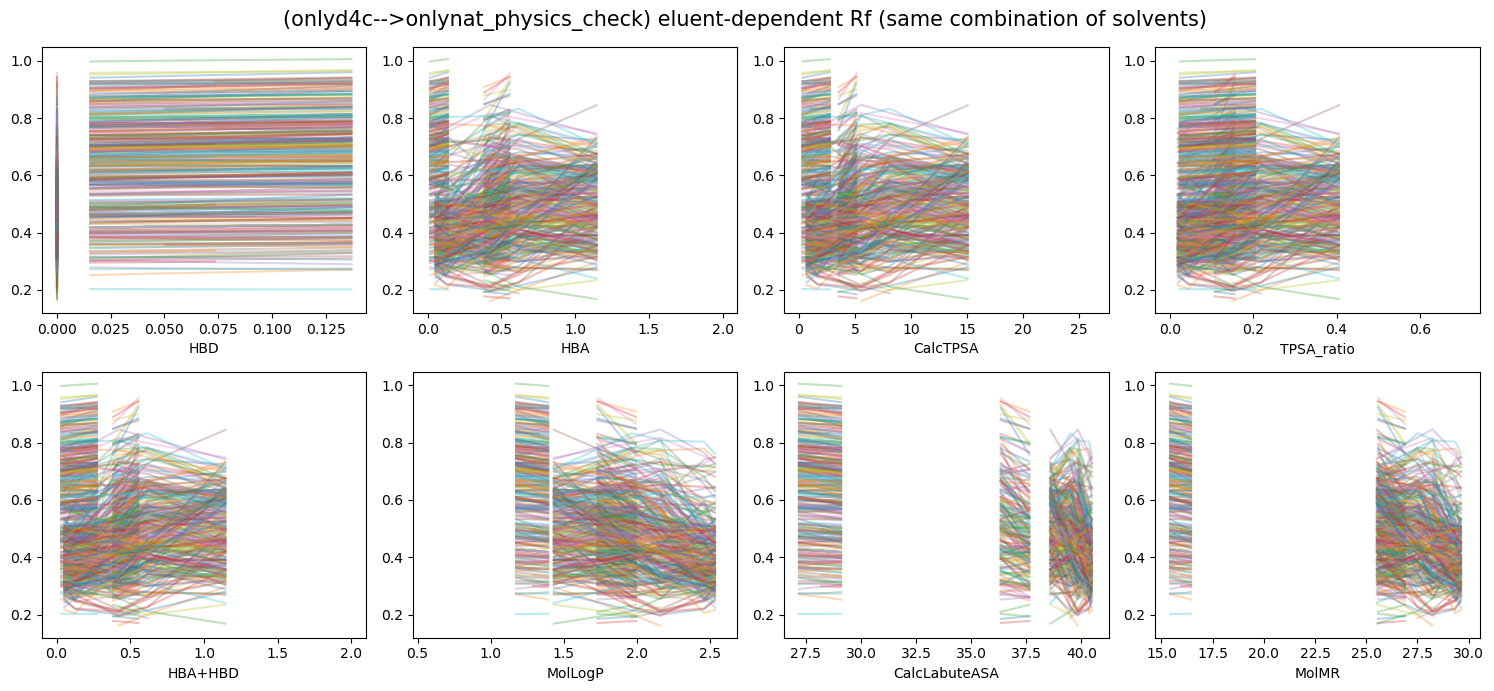

In [22]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,4, figsize = (15,7))

for idx,column_name in enumerate(valid_eluent_extended.columns[7:]):
    for group in pair_group_list:
        group.sort_values(by = column_name)
        x_line = group[column_name]
        y_line = group['prediction']
        axs[idx//4, idx%4].plot(x_line, y_line, alpha=0.3)
        axs[idx//4, idx%4].set_xlabel(column_name)
plt.suptitle('(onlyd4c-->onlynat_physics_check) eluent-dependent Rf (same combination of solvents)', fontsize=15)
plt.tight_layout()  # 저장 전에 레이아웃 조정해서 짤림 방지
#plt.savefig('(onlyd4c-->onlynat_physics_check)data_analysis3.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# --> eluent는 전혀 파라미터 할당이 안된 듯한 모습 (비율만 고려 못하는게 아니라 용매 종류가 바뀌어도 같은 시료는 같은 예측값 내놓음)
# GCN_eluent 파라미터 확인해보면 0

HBA atom indices: ((6,), (9,), (18,))


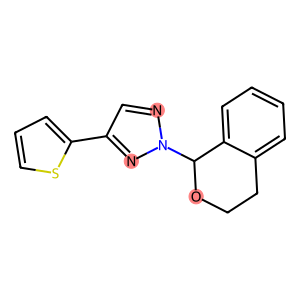

In [29]:
from rdkit import Chem
from rdkit.Chem import Draw

# 💡 수소결합 수용체 SMARTS 패턴 (위 이미지 기준)
hba_smarts = '[$([!#6;+0]);!$([F,Cl,Br,I]);!$([o,s,nX3]);!$([Nv5,Pv5,Sv4,Sv6])]'

# 예시 분자: 아세톤 (Acetone)
mol = Chem.MolFromSmiles('c1csc(-c2cnn(C3OCCc4ccccc43)n2)c1')

# SMARTS를 RDKit 패턴으로 컴파일
hba_query = Chem.MolFromSmarts(hba_smarts)

# 매칭되는 atom index 찾기
matches = mol.GetSubstructMatches(hba_query)

# 결과 출력
print("HBA atom indices:", matches)

# 🔍 시각화: 일치하는 원자 표시
atom_indices = [i[0] for i in matches]  # matches는 튜플 리스트
highlighted = Draw.MolToImage(mol, highlightAtoms=atom_indices)
highlighted.show()



In [3]:
CalcNumHBA(Chem.MolFromSmiles('c1csc(-c2cnn(C3OCCc4ccccc43)n2)c1'))

5